✅ Archivo FASTA creado en: ../data/processed/tRNA_sequences.fasta
⏳ Ejecutando MUSCLE (v5) para el alineamiento múltiple...
✅ Alineamiento guardado en: tRNA_alignment.fasta
⏳ Construyendo el árbol filogenético con FastTree...
✅ Árbol filogenético guardado en: tRNA_phylogenetic_tree.nhx
📊 Visualizando el árbol filogenético...


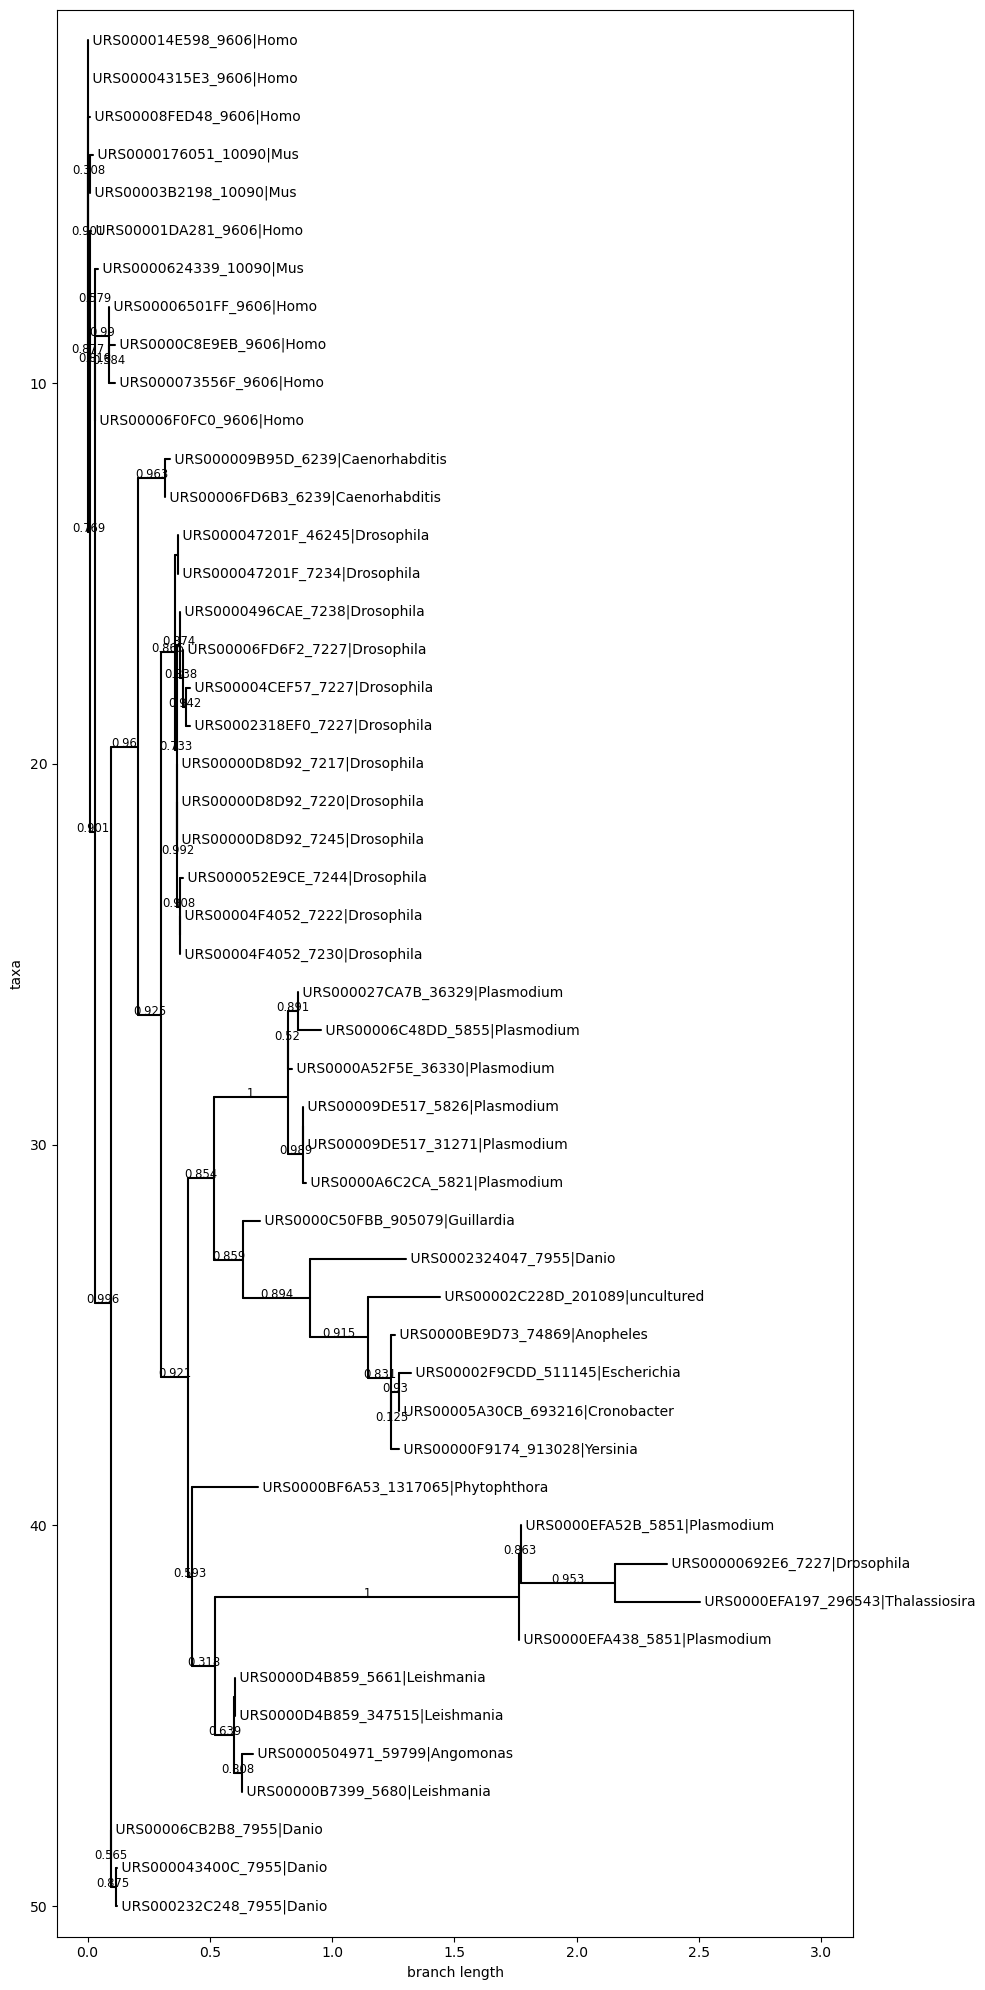

✅ Imagen del árbol guardada en: tRNA_tree.png


In [ ]:
import os
import pandas as pd
import subprocess
from Bio import Phylo
import matplotlib.pyplot as plt

# =====================================================
# 🔧 Configuración de rutas
# =====================================================

# Archivos de entrada/salida
input_file = "../data/raw/50_trna_sec.csv"
output_fasta = "../data/processed/tRNA_sequences.fasta"
alignment_file = "tRNA_alignment.fasta"
tree_file = "tRNA_phylogenetic_tree.nhx"

# Ejecutables externos (ajusta según tu instalación)
muscle_exe = r"C:\Program Files\MUSCLE\muscle.exe"
fasttree_exe = r"C:\Program Files\FastTree\FastTree.exe"  # ⚠️ ajustar ruta si lo instalás

# =====================================================
# 1. Convertir CSV a FASTA
# =====================================================
def convert_csv_to_fasta(csv_path, fasta_path):
    """Convierte el archivo CSV con secuencias a formato FASTA."""
    try:
        df = pd.read_csv(csv_path)
        with open(fasta_path, "w") as fasta_file:
            for index, row in df.iterrows():
                header = f">{row['URS_ID']}|{row['species']}|{row['description']}"
                sequence = row['Sequence']
                fasta_file.write(f"{header}\n{sequence}\n")
        print(f"✅ Archivo FASTA creado en: {fasta_path}")
    except FileNotFoundError:
        print(f"❌ Error: El archivo {csv_path} no fue encontrado.")
    except Exception as e:
        print(f"❌ Ocurrió un error al convertir a FASTA: {e}")

# =====================================================
# 2. Alineamiento con MUSCLE
# =====================================================
def run_muscle_alignment(input_fasta, output_alignment):
    """Ejecuta MUSCLE v5 para el alineamiento múltiple usando subprocess."""
    if not os.path.exists(input_fasta):
        print(f"❌ Error: El archivo de entrada FASTA '{input_fasta}' no existe.")
        return
    
    print("⏳ Ejecutando MUSCLE (v5) para el alineamiento múltiple...")

    try:
        subprocess.run(
            [muscle_exe, "-align", input_fasta, "-output", output_alignment],
            check=True
        )
        if os.path.exists(output_alignment) and os.path.getsize(output_alignment) > 0:
            print(f"✅ Alineamiento guardado en: {output_alignment}")
        else:
            print("❌ Error: MUSCLE no generó salida.")
    except subprocess.CalledProcessError as e:
        print(f"❌ Error ejecutando MUSCLE: {e}")
    except FileNotFoundError:
        print(f"❌ No se encontró MUSCLE en la ruta: {muscle_exe}")

# =====================================================
# 3. Construcción del Árbol con FastTree
# =====================================================
def build_phylogenetic_tree(alignment_file, tree_file):
    """Construye un árbol filogenético a partir del alineamiento usando FastTree."""
    if not os.path.exists(alignment_file):
        print(f"❌ Error: El archivo de alineamiento '{alignment_file}' no existe.")
        return
    
    print("⏳ Construyendo el árbol filogenético con FastTree...")

    try:
        with open(tree_file, "w") as f_out:
            subprocess.run(
                [fasttree_exe, "-nt", alignment_file],
                stdout=f_out,
                check=True
            )
        if os.path.exists(tree_file) and os.path.getsize(tree_file) > 0:
            print(f"✅ Árbol filogenético guardado en: {tree_file}")
        else:
            print("❌ Error: FastTree no generó salida.")
    except subprocess.CalledProcessError as e:
        print(f"❌ Error ejecutando FastTree: {e}")
    except FileNotFoundError:
        print(f"❌ No se encontró FastTree en la ruta: {fasttree_exe}")

# =====================================================
# 4. Visualización del Árbol
# =====================================================
def visualize_tree(tree_file, out_image="tree.png"):
    """Carga y dibuja el árbol filogenético con Biopython."""
    if not os.path.exists(tree_file):
        print(f"❌ Error: El archivo de árbol '{tree_file}' no existe.")
        return
    
    print("📊 Visualizando el árbol filogenético...")
    tree = Phylo.read(tree_file, "newick")

    # Dibujo en pantalla
    fig = plt.figure(figsize=(10, 20))  # Ajusta tamaño según la cantidad de secuencias
    axes = fig.add_subplot(1, 1, 1)
    Phylo.draw(tree, axes=axes, do_show=False)
    plt.tight_layout()
    plt.show()

    # Guardar como imagen
    fig.savefig(out_image, dpi=300, bbox_inches="tight")
    print(f"✅ Imagen del árbol guardada en: {out_image}")

# =====================================================
# 5. Ejecutar pipeline completo
# =====================================================
if __name__ == "__main__":

    # 1. Convertir CSV a FASTA
    convert_csv_to_fasta(input_file, output_fasta)

    # 2. Alineamiento MUSCLE
    if os.path.exists(output_fasta):
        run_muscle_alignment(output_fasta, alignment_file)
    
    # 3. Construcción del árbol
    if os.path.exists(alignment_file):
        build_phylogenetic_tree(alignment_file, tree_file)

    # 4. Visualización del árbol
    if os.path.exists(tree_file):
        visualize_tree(tree_file, out_image="tRNA_tree.png")



In [37]:
from ete3 import Tree, TreeStyle
import os
from IPython.display import Image, display

def visualize_tree_radial(tree_file, out_image="tree_radial.png"):
    """Visualiza el árbol filogenético en formato radial usando ete3, guarda PNG y lo muestra en Jupyter."""
    if not os.path.exists(tree_file):
        print(f"❌ Error: El archivo de árbol '{tree_file}' no existe.")
        return
    
    print("📊 Visualizando el árbol filogenético en formato radial...")

    t = Tree(tree_file)

    ts = TreeStyle()
    ts.mode = "c"        # circular
    ts.show_leaf_name = True
    ts.show_branch_support = True
    ts.scale = 50

    # 1. Guardar la imagen como antes
    t.render(out_image, tree_style=ts, w=2000, units="px")
    print(f"✅ Imagen radial del árbol guardada en: {out_image}")

    # 2. **Mostrar la imagen en la celda de Jupyter Notebook**
    display(Image(filename=out_image))

    
from Bio import Phylo
from collections import Counter


def interpret_tree(tree_file, min_clade_size=4, top_n=5):
    """Interpreta el árbol filogenético resaltando clados relevantes y evitando redundancias."""
    if not os.path.exists(tree_file):
        print(f"❌ Error: El archivo '{tree_file}' no existe.")
        return

    print("📖 Interpretando el árbol filogenético...\n")
    tree = Phylo.read(tree_file, "newick")

    leaves = tree.get_terminals()
    print(f"🌿 Número total de secuencias: {len(leaves)}")

    # --- Conteo de especies global ---
    species = []
    for leaf in leaves:
        parts = str(leaf).split("|")
        if len(parts) > 1:
            species.append(parts[1])
    species_counts = Counter(species)

    print(f"\n🧾 Top {top_n} especies más frecuentes:")
    for sp, count in species_counts.most_common(top_n):
        print(f"   - {sp}: {count} secuencias")

    # --- Clados relevantes ---
    print(f"\n🌳 Clados relevantes (>= {min_clade_size} secuencias):")
    for i, clade in enumerate(tree.get_nonterminals()):
        sub_leaves = clade.get_terminals()
        n_seq = len(sub_leaves)

        # 1. Filtrar por tamaño
        if n_seq < min_clade_size:
            continue
        # 2. Saltar el árbol completo (raíz)
        if n_seq == len(leaves):
            continue

        # Conteo de especies dentro del clado
        sub_species = [str(leaf).split("|")[1] for leaf in sub_leaves if "|" in str(leaf)]
        sp_counts = Counter(sub_species)

        # 3. Reportar solo clados "informativos"
        if len(sp_counts) > 1 or max(sp_counts.values()) >= min_clade_size:
            print(f"\n🔹 Clado {i+1}: {n_seq} secuencias, {len(sp_counts)} especies")
            for sp, c in sp_counts.most_common(3):
                print(f"   - {sp}: {c} secuencias")
            ejemplos = [str(sub_leaves[j]) for j in range(min(3, n_seq))]
            print("   Ejemplos:", ejemplos)

✅ Archivo FASTA creado en: ../data/processed/tRNA_sequences.fasta
⏳ Ejecutando MUSCLE (v5) para el alineamiento múltiple...
✅ Alineamiento guardado en: tRNA_alignment.fasta
⏳ Construyendo el árbol filogenético con FastTree...
✅ Árbol filogenético guardado en: tRNA_phylogenetic_tree.nhx
📊 Visualizando el árbol filogenético en formato radial...
✅ Imagen radial del árbol guardada en: tRNA_tree_radial.png


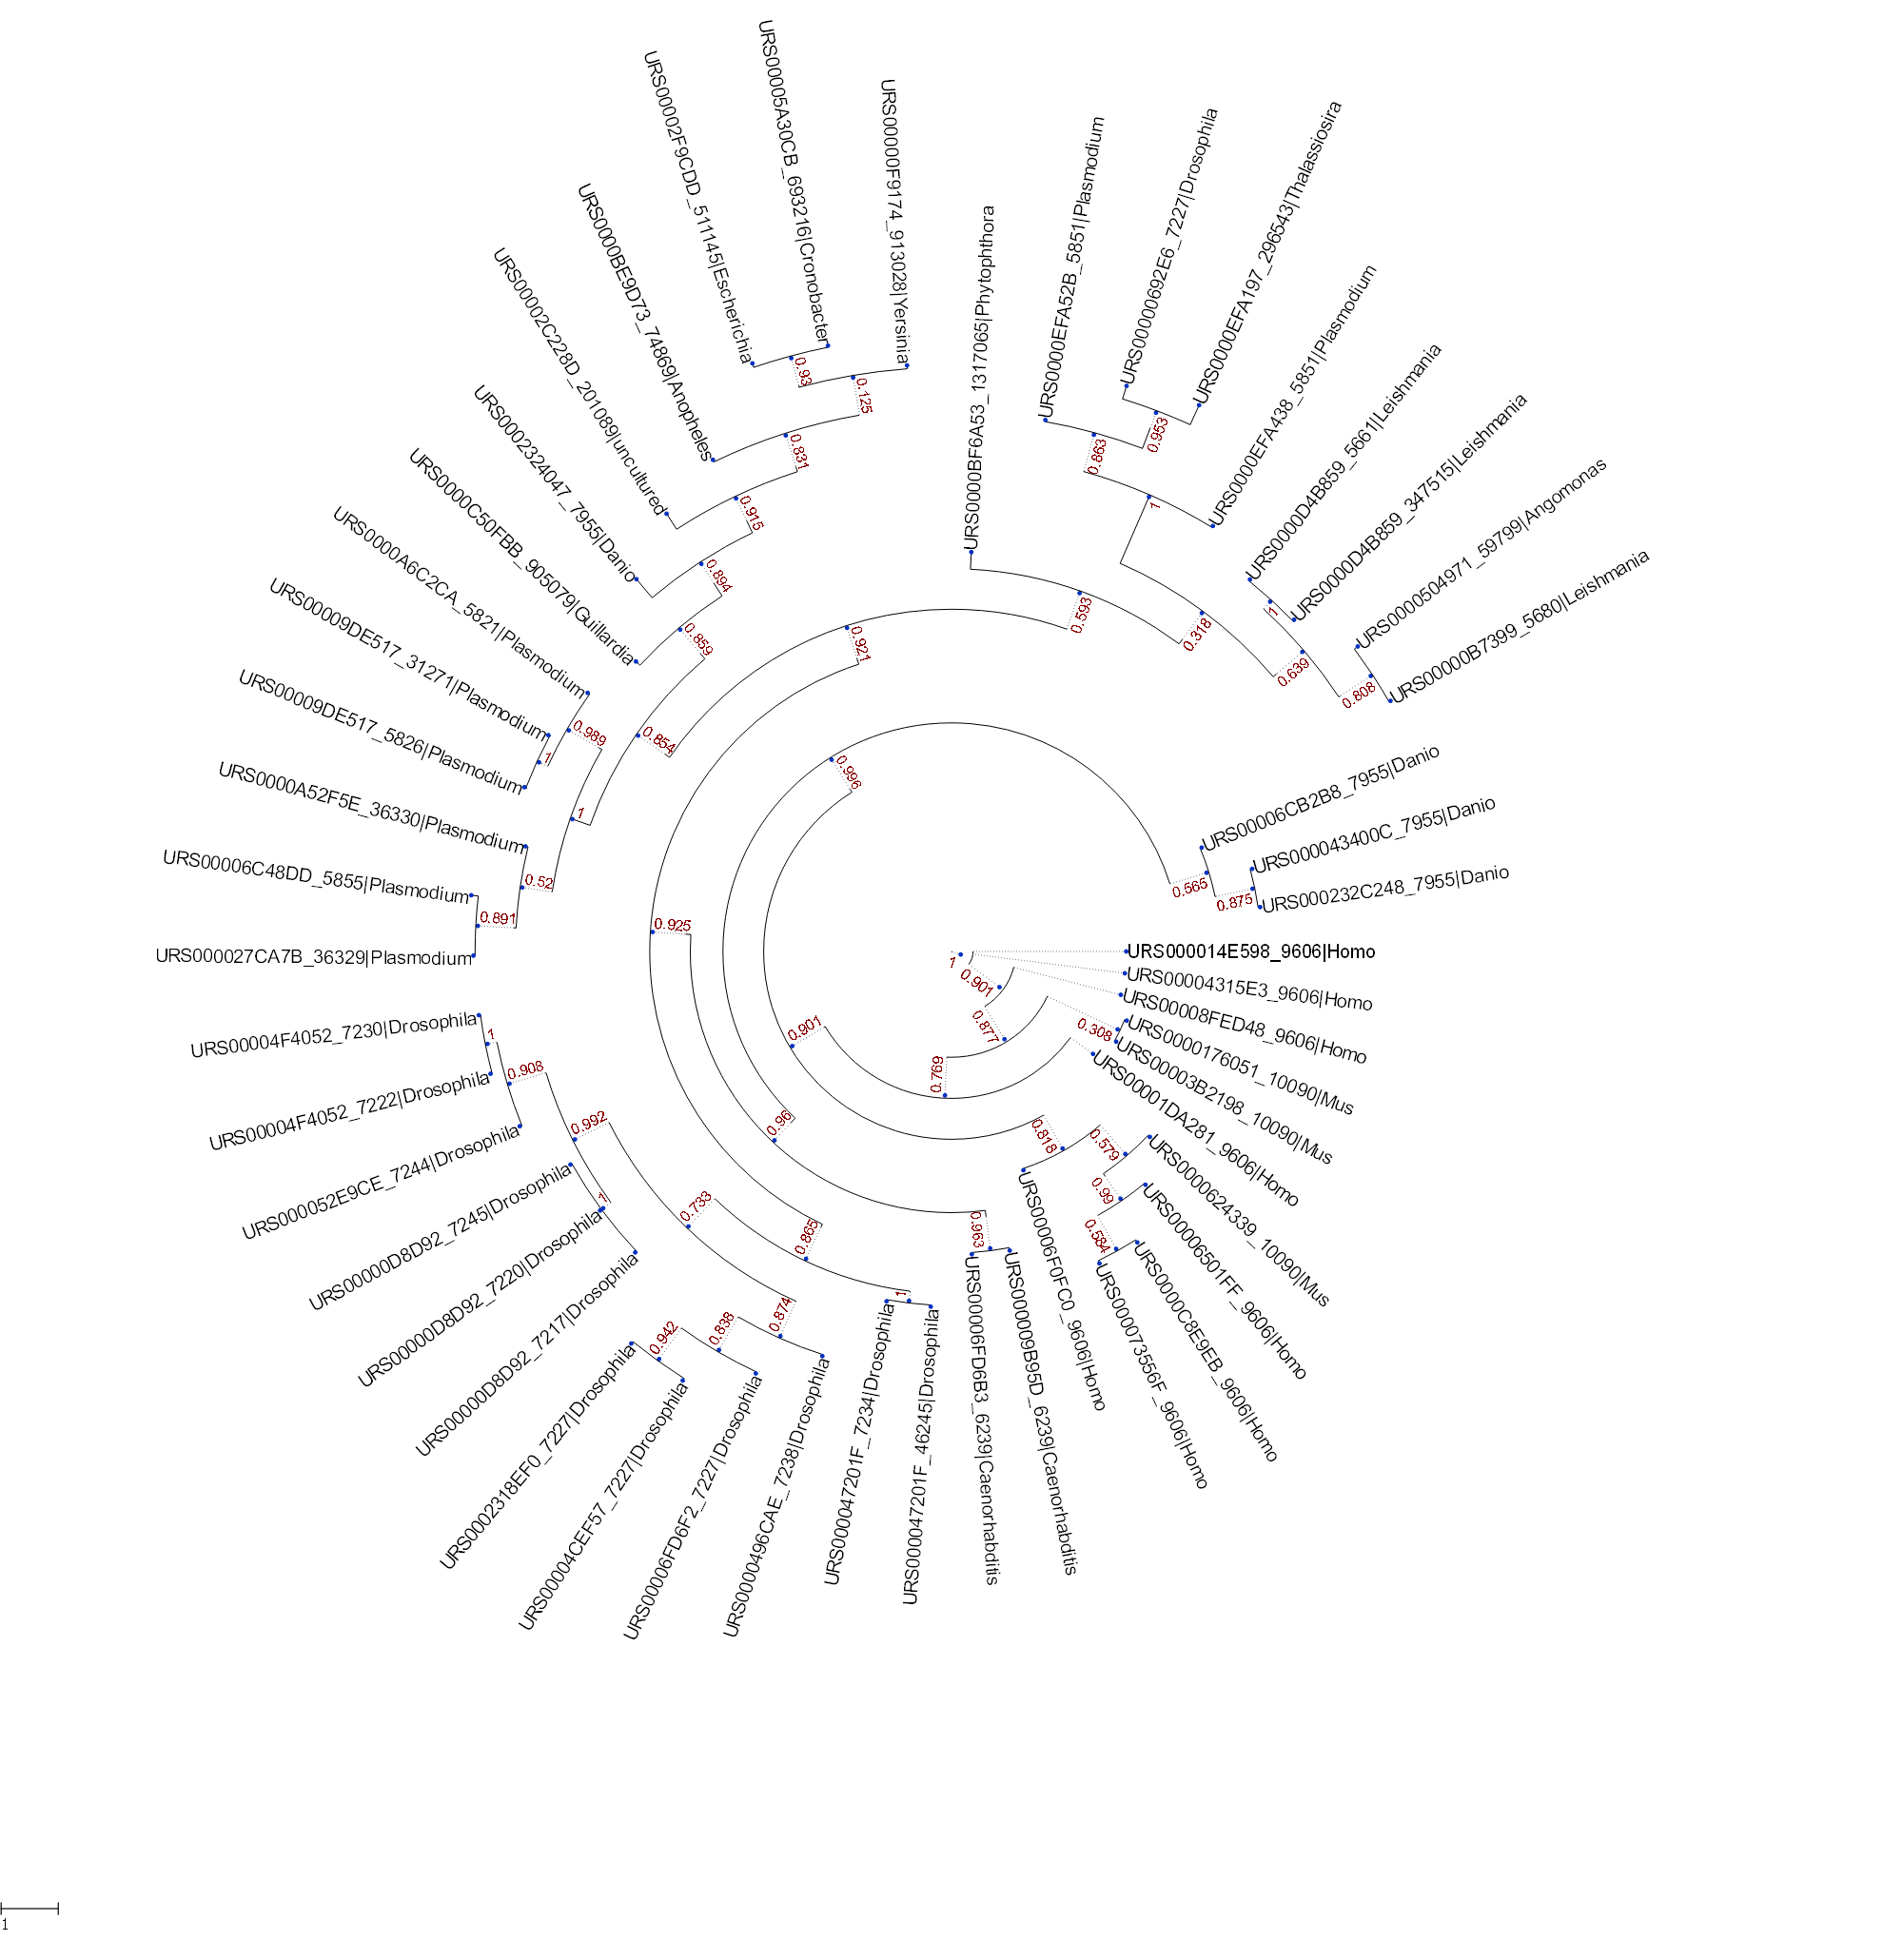

📖 Interpretando el árbol filogenético...

🌿 Número total de secuencias: 50

🧾 Top 10 especies más frecuentes:
   - Drosophila: 13 secuencias
   - Homo: 8 secuencias
   - Plasmodium: 8 secuencias
   - Danio: 4 secuencias
   - Mus: 3 secuencias
   - Leishmania: 3 secuencias
   - Caenorhabditis: 2 secuencias
   - Guillardia: 1 secuencias
   - uncultured: 1 secuencias
   - Anopheles: 1 secuencias

🌳 Clados relevantes (>= 4 secuencias):

🔹 Clado 2: 48 secuencias, 16 especies
   - Drosophila: 13 secuencias
   - Plasmodium: 8 secuencias
   - Homo: 6 secuencias
   Ejemplos: ['URS00008FED48_9606|Homo', 'URS0000176051_10090|Mus', 'URS00003B2198_10090|Mus']

🔹 Clado 3: 47 secuencias, 16 especies
   - Drosophila: 13 secuencias
   - Plasmodium: 8 secuencias
   - Homo: 5 secuencias
   Ejemplos: ['URS0000176051_10090|Mus', 'URS00003B2198_10090|Mus', 'URS00001DA281_9606|Homo']

🔹 Clado 5: 45 secuencias, 16 especies
   - Drosophila: 13 secuencias
   - Plasmodium: 8 secuencias
   - Homo: 5 secuencias
  

In [38]:
if __name__ == "__main__":

    # 1. Convertir CSV a FASTA
    convert_csv_to_fasta(input_file, output_fasta)

    # 2. Alineamiento MUSCLE
    if os.path.exists(output_fasta):
        run_muscle_alignment(output_fasta, alignment_file)
    
    # 3. Construcción del árbol
    if os.path.exists(alignment_file):
        build_phylogenetic_tree(alignment_file, tree_file)
        
    # 4. Visualización del árbol
    if os.path.exists(tree_file):
        visualize_tree_radial(tree_file, out_image="tRNA_tree_radial.png")


    # 5. Interpretación automática
    if os.path.exists(tree_file):
        interpret_tree(tree_file, top_n=10)


✅ Archivo FASTA creado en: ../data/processed/tRNA_sequences.fasta
⏳ Ejecutando MUSCLE (v5) para el alineamiento múltiple...
✅ Alineamiento guardado en: tRNA_alignment.fasta
⏳ Construyendo el árbol filogenético con FastTree...
✅ Árbol filogenético guardado en: tRNA_phylogenetic_tree.nhx
📊 Visualizando el árbol filogenético...


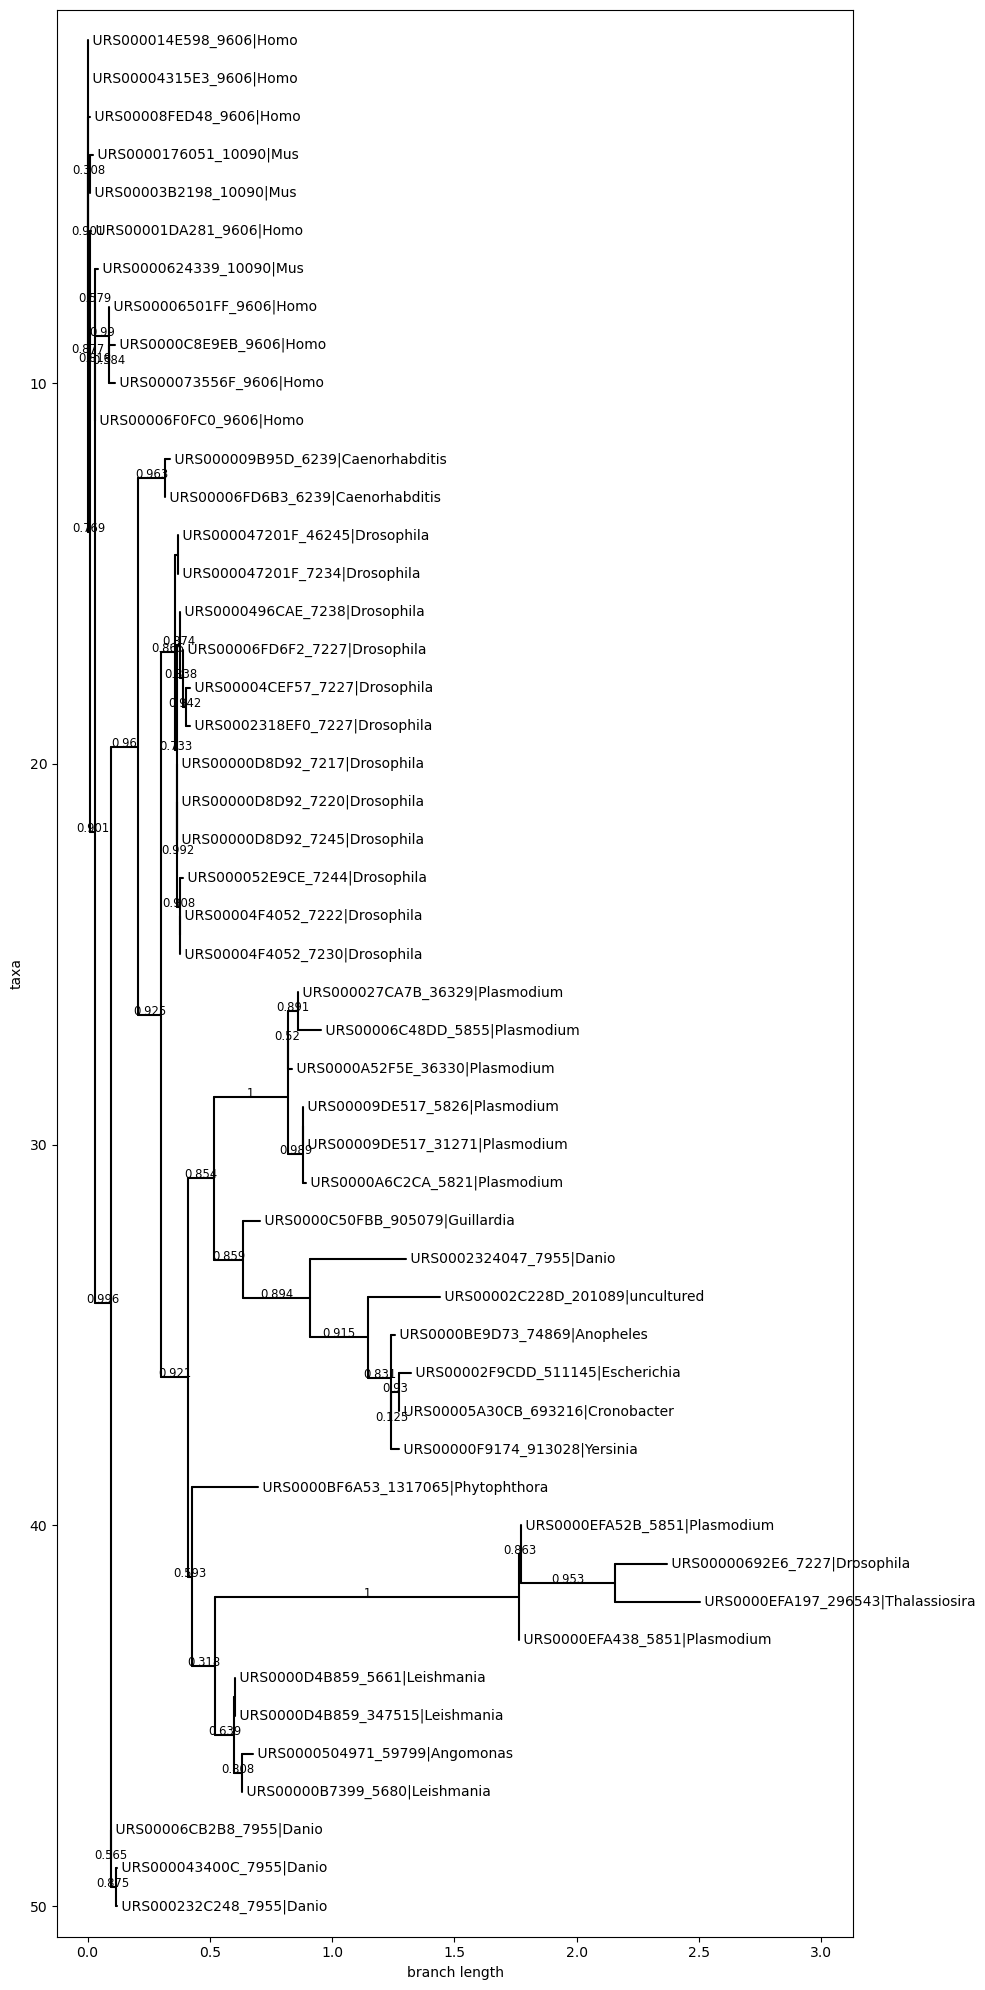

✅ Imagen del árbol guardada en: tRNA_tree.png
📖 Interpretando el árbol filogenético...

🌿 Número total de secuencias: 50

🌳 Clados relevantes (bootstrap ≥ 0.7, tamaño ≥ 4):

🔹 Clado 2: 48 secuencias, 16 especies (bootstrap=0.90)
   - Drosophila: 13 secuencias
   - Plasmodium: 8 secuencias
   - Homo: 6 secuencias
   Ejemplos: ['URS00008FED48_9606|Homo', 'URS0000176051_10090|Mus', 'URS00003B2198_10090|Mus']

🔹 Clado 3: 47 secuencias, 16 especies (bootstrap=0.88)
   - Drosophila: 13 secuencias
   - Plasmodium: 8 secuencias
   - Homo: 5 secuencias
   Ejemplos: ['URS0000176051_10090|Mus', 'URS00003B2198_10090|Mus', 'URS00001DA281_9606|Homo']

🔹 Clado 5: 45 secuencias, 16 especies (bootstrap=0.77)
   - Drosophila: 13 secuencias
   - Plasmodium: 8 secuencias
   - Homo: 5 secuencias
   Ejemplos: ['URS00001DA281_9606|Homo', 'URS0000624339_10090|Mus', 'URS00006501FF_9606|Homo']

🔹 Clado 6: 44 secuencias, 16 especies (bootstrap=0.90)
   - Drosophila: 13 secuencias
   - Plasmodium: 8 secuencias
  

In [41]:
import os
import pandas as pd
import subprocess
from Bio import Phylo
import matplotlib.pyplot as plt

# =====================================================
# 🔧 Configuración de rutas
# =====================================================

# Archivos de entrada/salida
input_file = "../data/raw/50_trna_sec.csv"
output_fasta = "../data/processed/tRNA_sequences.fasta"
alignment_file = "tRNA_alignment.fasta"
tree_file = "tRNA_phylogenetic_tree.nhx"

# Ejecutables externos (ajusta según tu instalación)
muscle_exe = r"C:\Program Files\MUSCLE\muscle.exe"
fasttree_exe = r"C:\Program Files\FastTree\FastTree.exe"  # ⚠️ ajustar ruta si lo instalás

# =====================================================
# 1. Convertir CSV a FASTA
# =====================================================
def convert_csv_to_fasta(csv_path, fasta_path):
    """Convierte el archivo CSV con secuencias a formato FASTA."""
    try:
        df = pd.read_csv(csv_path)
        with open(fasta_path, "w") as fasta_file:
            for index, row in df.iterrows():
                header = f">{row['URS_ID']}|{row['species']}|{row['description']}"
                sequence = row['Sequence']
                fasta_file.write(f"{header}\n{sequence}\n")
        print(f"✅ Archivo FASTA creado en: {fasta_path}")
    except FileNotFoundError:
        print(f"❌ Error: El archivo {csv_path} no fue encontrado.")
    except Exception as e:
        print(f"❌ Ocurrió un error al convertir a FASTA: {e}")

# =====================================================
# 2. Alineamiento con MUSCLE
# =====================================================
def run_muscle_alignment(input_fasta, output_alignment):
    """Ejecuta MUSCLE v5 para el alineamiento múltiple usando subprocess."""
    if not os.path.exists(input_fasta):
        print(f"❌ Error: El archivo de entrada FASTA '{input_fasta}' no existe.")
        return
    
    print("⏳ Ejecutando MUSCLE (v5) para el alineamiento múltiple...")

    try:
        subprocess.run(
            [muscle_exe, "-align", input_fasta, "-output", output_alignment],
            check=True
        )
        if os.path.exists(output_alignment) and os.path.getsize(output_alignment) > 0:
            print(f"✅ Alineamiento guardado en: {output_alignment}")
        else:
            print("❌ Error: MUSCLE no generó salida.")
    except subprocess.CalledProcessError as e:
        print(f"❌ Error ejecutando MUSCLE: {e}")
    except FileNotFoundError:
        print(f"❌ No se encontró MUSCLE en la ruta: {muscle_exe}")

# =====================================================
# 3. Construcción del Árbol con FastTree
# =====================================================
def build_phylogenetic_tree(alignment_file, tree_file):
    """Construye un árbol filogenético a partir del alineamiento usando FastTree."""
    if not os.path.exists(alignment_file):
        print(f"❌ Error: El archivo de alineamiento '{alignment_file}' no existe.")
        return
    
    print("⏳ Construyendo el árbol filogenético con FastTree...")

    try:
        with open(tree_file, "w") as f_out:
            subprocess.run(
                [fasttree_exe, "-nt", alignment_file],
                stdout=f_out,
                check=True
            )
        if os.path.exists(tree_file) and os.path.getsize(tree_file) > 0:
            print(f"✅ Árbol filogenético guardado en: {tree_file}")
        else:
            print("❌ Error: FastTree no generó salida.")
    except subprocess.CalledProcessError as e:
        print(f"❌ Error ejecutando FastTree: {e}")
    except FileNotFoundError:
        print(f"❌ No se encontró FastTree en la ruta: {fasttree_exe}")

# =====================================================
# 4. Visualización del Árbol
# =====================================================
def visualize_tree(tree_file, out_image="tree.png"):
    """Carga y dibuja el árbol filogenético con Biopython."""
    if not os.path.exists(tree_file):
        print(f"❌ Error: El archivo de árbol '{tree_file}' no existe.")
        return
    
    print("📊 Visualizando el árbol filogenético...")
    tree = Phylo.read(tree_file, "newick")

    # Dibujo en pantalla
    fig = plt.figure(figsize=(10, 20))  # Ajusta tamaño según la cantidad de secuencias
    axes = fig.add_subplot(1, 1, 1)
    Phylo.draw(tree, axes=axes, do_show=False)
    plt.tight_layout()
    plt.show()

    # Guardar como imagen
    fig.savefig(out_image, dpi=300, bbox_inches="tight")
    print(f"✅ Imagen del árbol guardada en: {out_image}")

from Bio import Phylo
from collections import Counter

def interpret_tree(tree_file, min_clade_size=4, support_cutoff=0.7):
    """Interpreta el árbol resaltando clados bien soportados."""
    if not os.path.exists(tree_file):
        print(f"❌ Error: El archivo '{tree_file}' no existe.")
        return

    print("📖 Interpretando el árbol filogenético...\n")
    tree = Phylo.read(tree_file, "newick")
    leaves = tree.get_terminals()

    print(f"🌿 Número total de secuencias: {len(leaves)}")

    # Clados bien soportados
    print(f"\n🌳 Clados relevantes (bootstrap ≥ {support_cutoff}, tamaño ≥ {min_clade_size}):")
    for i, clade in enumerate(tree.get_nonterminals()):
        sub_leaves = clade.get_terminals()
        n_seq = len(sub_leaves)

        # Filtrar raíz
        if n_seq == len(leaves):
            continue

        # Filtro de tamaño
        if n_seq < min_clade_size:
            continue

        # Filtro de soporte
        if hasattr(clade, "confidence") and clade.confidence is not None:
            if clade.confidence < support_cutoff:
                continue
            support = clade.confidence
        else:
            continue

        # Composición taxonómica
        sub_species = [str(leaf).split("|")[1] for leaf in sub_leaves if "|" in str(leaf)]
        sp_counts = Counter(sub_species)

        print(f"\n🔹 Clado {i+1}: {n_seq} secuencias, {len(sp_counts)} especies (bootstrap={support:.2f})")
        for sp, c in sp_counts.most_common(3):
            print(f"   - {sp}: {c} secuencias")
        ejemplos = [str(sub_leaves[j]) for j in range(min(3, n_seq))]
        print("   Ejemplos:", ejemplos)

# =====================================================
# 5. Ejecutar pipeline completo
# =====================================================
if __name__ == "__main__":

    # 1. Convertir CSV a FASTA
    convert_csv_to_fasta(input_file, output_fasta)

    # 2. Alineamiento MUSCLE
    if os.path.exists(output_fasta):
        run_muscle_alignment(output_fasta, alignment_file)
    
    # 3. Construcción del árbol
    if os.path.exists(alignment_file):
        build_phylogenetic_tree(alignment_file, tree_file)

    # 4. Visualización del árbol
    if os.path.exists(tree_file):
        visualize_tree(tree_file, out_image="tRNA_tree.png")
        # 5. Interpretación automática
    if os.path.exists(tree_file):
        interpret_tree(tree_file, min_clade_size=4, support_cutoff=0.7)




In [6]:
import os
import pandas as pd
import subprocess
from Bio import Phylo
import matplotlib.pyplot as plt
from collections import Counter
from ete3 import Tree, TreeStyle
from IPython.display import Image, display

# =====================================================
# 🔧 Configuración de rutas
# =====================================================

# Archivos de entrada/salida
input_file = "../data/raw/200_trna_sec.csv"
output_fasta = "../data/processed/tRNA_sequences.fasta"
alignment_file = "tRNA_alignment.fasta"
tree_file = "tRNA_phylogenetic_tree.nhx"

# Ejecutables externos (ajusta según tu instalación)
muscle_exe = r"C:\Program Files\MUSCLE\muscle.exe"
fasttree_exe = r"C:\Program Files\FastTree\FastTree.exe"

# =====================================================
# 1. Convertir CSV a FASTA
# =====================================================
def convert_csv_to_fasta(csv_path, fasta_path):
    """
    Convierte el archivo CSV a FASTA, priorizando el nombre científico
    de la columna 'description' para una taxonomía más precisa.
    """
    try:
        df = pd.read_csv(csv_path)
        with open(fasta_path, "w") as fasta_file:
            for index, row in df.iterrows():
                # Patrón para encontrar nombres científicos (e.g., "Genus species")
                match = re.search(r'([A-Z][a-z]+ [a-z]+)', row['description'])
                
                # Usar el nombre científico si se encuentra, de lo contrario, usar el original
                if match:
                    species_name = match.group(1)
                else:
                    species_name = row['species']
                
                header = f">{row['URS_ID']}|{species_name}|{row['description']}"
                sequence = row['Sequence']
                fasta_file.write(f"{header}\n{sequence}\n")
        print(f"✅ Archivo FASTA creado en: {fasta_path}")
    except FileNotFoundError:
        print(f"❌ Error: El archivo {csv_path} no fue encontrado.")
    except Exception as e:
        print(f"❌ Ocurrió un error al convertir a FASTA: {e}")

# =====================================================
# 2. Alineamiento con MUSCLE
# =====================================================
def run_muscle_alignment(input_fasta, output_alignment):
    """Ejecuta MUSCLE v5 para el alineamiento múltiple usando subprocess."""
    if not os.path.exists(input_fasta):
        print(f"❌ Error: El archivo de entrada FASTA '{input_fasta}' no existe.")
        return
    
    print("⏳ Ejecutando MUSCLE (v5) para el alineamiento múltiple...")

    try:
        subprocess.run(
            [muscle_exe, "-align", input_fasta, "-output", output_alignment],
            check=True
        )
        if os.path.exists(output_alignment) and os.path.getsize(output_alignment) > 0:
            print(f"✅ Alineamiento guardado en: {output_alignment}")
        else:
            print("❌ Error: MUSCLE no generó salida.")
    except subprocess.CalledProcessError as e:
        print(f"❌ Error ejecutando MUSCLE: {e}")
    except FileNotFoundError:
        print(f"❌ No se encontró MUSCLE en la ruta: {muscle_exe}")

# =====================================================
# 3. Construcción del Árbol con FastTree
# =====================================================

def build_phylogenetic_tree(input_alignment, output_tree):
    """
    Construye un árbol filogenético usando FastTree.
    """
    if not os.path.exists(input_alignment):
        print(f"❌ Error: El archivo de alineamiento '{input_alignment}' no existe.")
        return
    
    print("⏳ Construyendo el árbol filogenético con FastTree...")
    try:
        subprocess.run(
            [fasttree_exe, "-nt", input_alignment, ">", output_tree],
            shell=True,
            check=True
        )
        if os.path.exists(output_tree) and os.path.getsize(output_tree) > 0:
            print(f"✅ Árbol guardado en: {output_tree}")
        else:
            print("❌ Error: FastTree no generó salida.")
    except subprocess.CalledProcessError as e:
        print(f"❌ Error ejecutando FastTree: {e}")
    except FileNotFoundError:
        print(f"❌ No se encontró FastTree en la ruta: {fasttree_exe}")


def visualize_tree_radial(tree_file, out_image="tree_radial.png"):
    """Visualiza el árbol filogenético en formato radial usando ete3, guarda PNG y lo muestra en Jupyter."""
    if not os.path.exists(tree_file):
        print(f"❌ Error: El archivo de árbol '{tree_file}' no existe.")
        return
    
    print("📊 Visualizando el árbol filogenético en formato radial...")

    t = Tree(tree_file)

    ts = TreeStyle()
    ts.mode = "c"       # circular
    ts.show_leaf_name = True
    ts.show_branch_support = True
    ts.scale = 50

    # 1. Guardar la imagen como antes
    t.render(out_image, tree_style=ts, w=2000, units="px")
    print(f"✅ Imagen radial del árbol guardada en: {out_image}")

    # 2. **Mostrar la imagen en la celda de Jupyter Notebook**
    display(Image(filename=out_image))

# =====================================================
# 4. Visualización del Árbol
# =====================================================
def visualize_tree(tree_file, out_image="tree.png"):
    """Carga y dibuja el árbol filogenético con Biopython."""
    if not os.path.exists(tree_file):
        print(f"❌ Error: El archivo de árbol '{tree_file}' no existe.")
        return
    
    print("📊 Visualizando el árbol filogenético...")
    tree = Phylo.read(tree_file, "newick")

    # Dibujo en pantalla
    fig = plt.figure(figsize=(10, 20))  # Ajusta tamaño según la cantidad de secuencias
    axes = fig.add_subplot(1, 1, 1)
    Phylo.draw(tree, axes=axes, do_show=False)
    plt.tight_layout()
    plt.show()

    # Guardar como imagen
    fig.savefig(out_image, dpi=300, bbox_inches="tight")
    print(f"✅ Imagen del árbol guardada en: {out_image}")

# =====================================================
# 5. Interpretación automática del Árbol
# =====================================================
def interpret_tree_markdown(tree_file, min_clade_size=4, support_cutoff=0.7, report_file="tree_report.md"):
    """
    Interpreta un árbol filogenético y genera un informe Markdown.
    
    - min_clade_size: número mínimo de secuencias para considerar un clado.
    - support_cutoff: bootstrap mínimo para reportar un clado.
    """
    if not os.path.exists(tree_file):
        print(f"❌ Error: No existe {tree_file}")
        return
    
    tree = Phylo.read(tree_file, "newick")
    leaves = tree.get_terminals()
    n_total = len(leaves)

    report = []
    report.append(f"# 📖 Interpretación automática del árbol filogenético\n")
    report.append(f"- Número total de secuencias: **{n_total}**\n")
    
    # --- Conteo global de especies
    species = [str(leaf).split("|")[1] for leaf in leaves if "|" in str(leaf)]
    sp_counts = Counter(species)
    report.append("## 🧾 Especies más frecuentes\n")
    for sp, c in sp_counts.most_common(10):
        report.append(f"- {sp}: {c} secuencias")

    # --- Clados monoespecíficos grandes
    report.append("\n## 🌱 Clados monoespecíficos grandes\n")
    for clade in tree.get_nonterminals():
        if hasattr(clade, "confidence") and clade.confidence is not None and clade.confidence < support_cutoff:
            continue

        sub_leaves = clade.get_terminals()
        if len(sub_leaves) < min_clade_size or len(sub_leaves) == n_total:
            continue

        sub_species = [str(leaf).split("|")[1] for leaf in sub_leaves if "|" in str(leaf)]
        sp_counts = Counter(sub_species)

        if len(sp_counts) == 1:  # solo una especie
            sp = list(sp_counts.keys())[0]
            confidence_str = f"{clade.confidence:.2f}" if clade.confidence is not None else "N/A"
            report.append(f"- {sp}: {len(sub_leaves)} secuencias (bootstrap={confidence_str})")
            ejemplos = [str(x) for x in sub_leaves[:3]]
            report.append(f"  - Ejemplos: {ejemplos}")

    # --- Clados mixtos
    report.append("\n## 🔀 Clados mixtos interesantes\n")
    for clade in tree.get_nonterminals():
        if hasattr(clade, "confidence") and clade.confidence is not None and clade.confidence < support_cutoff:
            continue

        sub_leaves = clade.get_terminals()
        if len(sub_leaves) < min_clade_size or len(sub_leaves) == n_total:
            continue

        sub_species = [str(leaf).split("|")[1] for leaf in sub_leaves if "|" in str(leaf)]
        sp_counts = Counter(sub_species)

        if len(sp_counts) > 1:
            confidence_str = f"{clade.confidence:.2f}" if clade.confidence is not None else "N/A"
            report.append(f"- Clado con {len(sub_leaves)} secuencias y {len(sp_counts)} especies (bootstrap={confidence_str})")
            for sp, c in sp_counts.most_common(3):
                report.append(f"  - {sp}: {c} secuencias")
            ejemplos = [str(x) for x in sub_leaves[:3]]
            report.append(f"  - Ejemplos: {ejemplos}")

    # --- Secuencias divergentes
    report.append("\n## 🌍 Secuencias divergentes / posibles outgroups\n")
    long_branches = sorted([(leaf, leaf.branch_length) for leaf in leaves if leaf.branch_length],
                             key=lambda x: x[1], reverse=True)[:10]
    for leaf, length in long_branches:
        report.append(f"- {leaf} (rama larga: {length:.3f})")

    # --- Guardar a archivo
    with open(report_file, "w", encoding="utf-8") as f:
        f.write("\n".join(report))

    print(f"✅ Informe generado en: {report_file}")

❌ Ocurrió un error al convertir a FASTA: name 're' is not defined
⏳ Ejecutando MUSCLE (v5) para el alineamiento múltiple...
❌ Error ejecutando MUSCLE: Command '['C:\\Program Files\\MUSCLE\\muscle.exe', '-align', '../data/processed/tRNA_sequences.fasta', '-output', 'tRNA_alignment.fasta']' returned non-zero exit status 3221225620.
⏳ Construyendo el árbol filogenético con FastTree...
✅ Árbol guardado en: tRNA_phylogenetic_tree.nhx
📊 Visualizando el árbol filogenético en formato radial...
✅ Imagen radial del árbol guardada en: tRNA_tree_radial.png


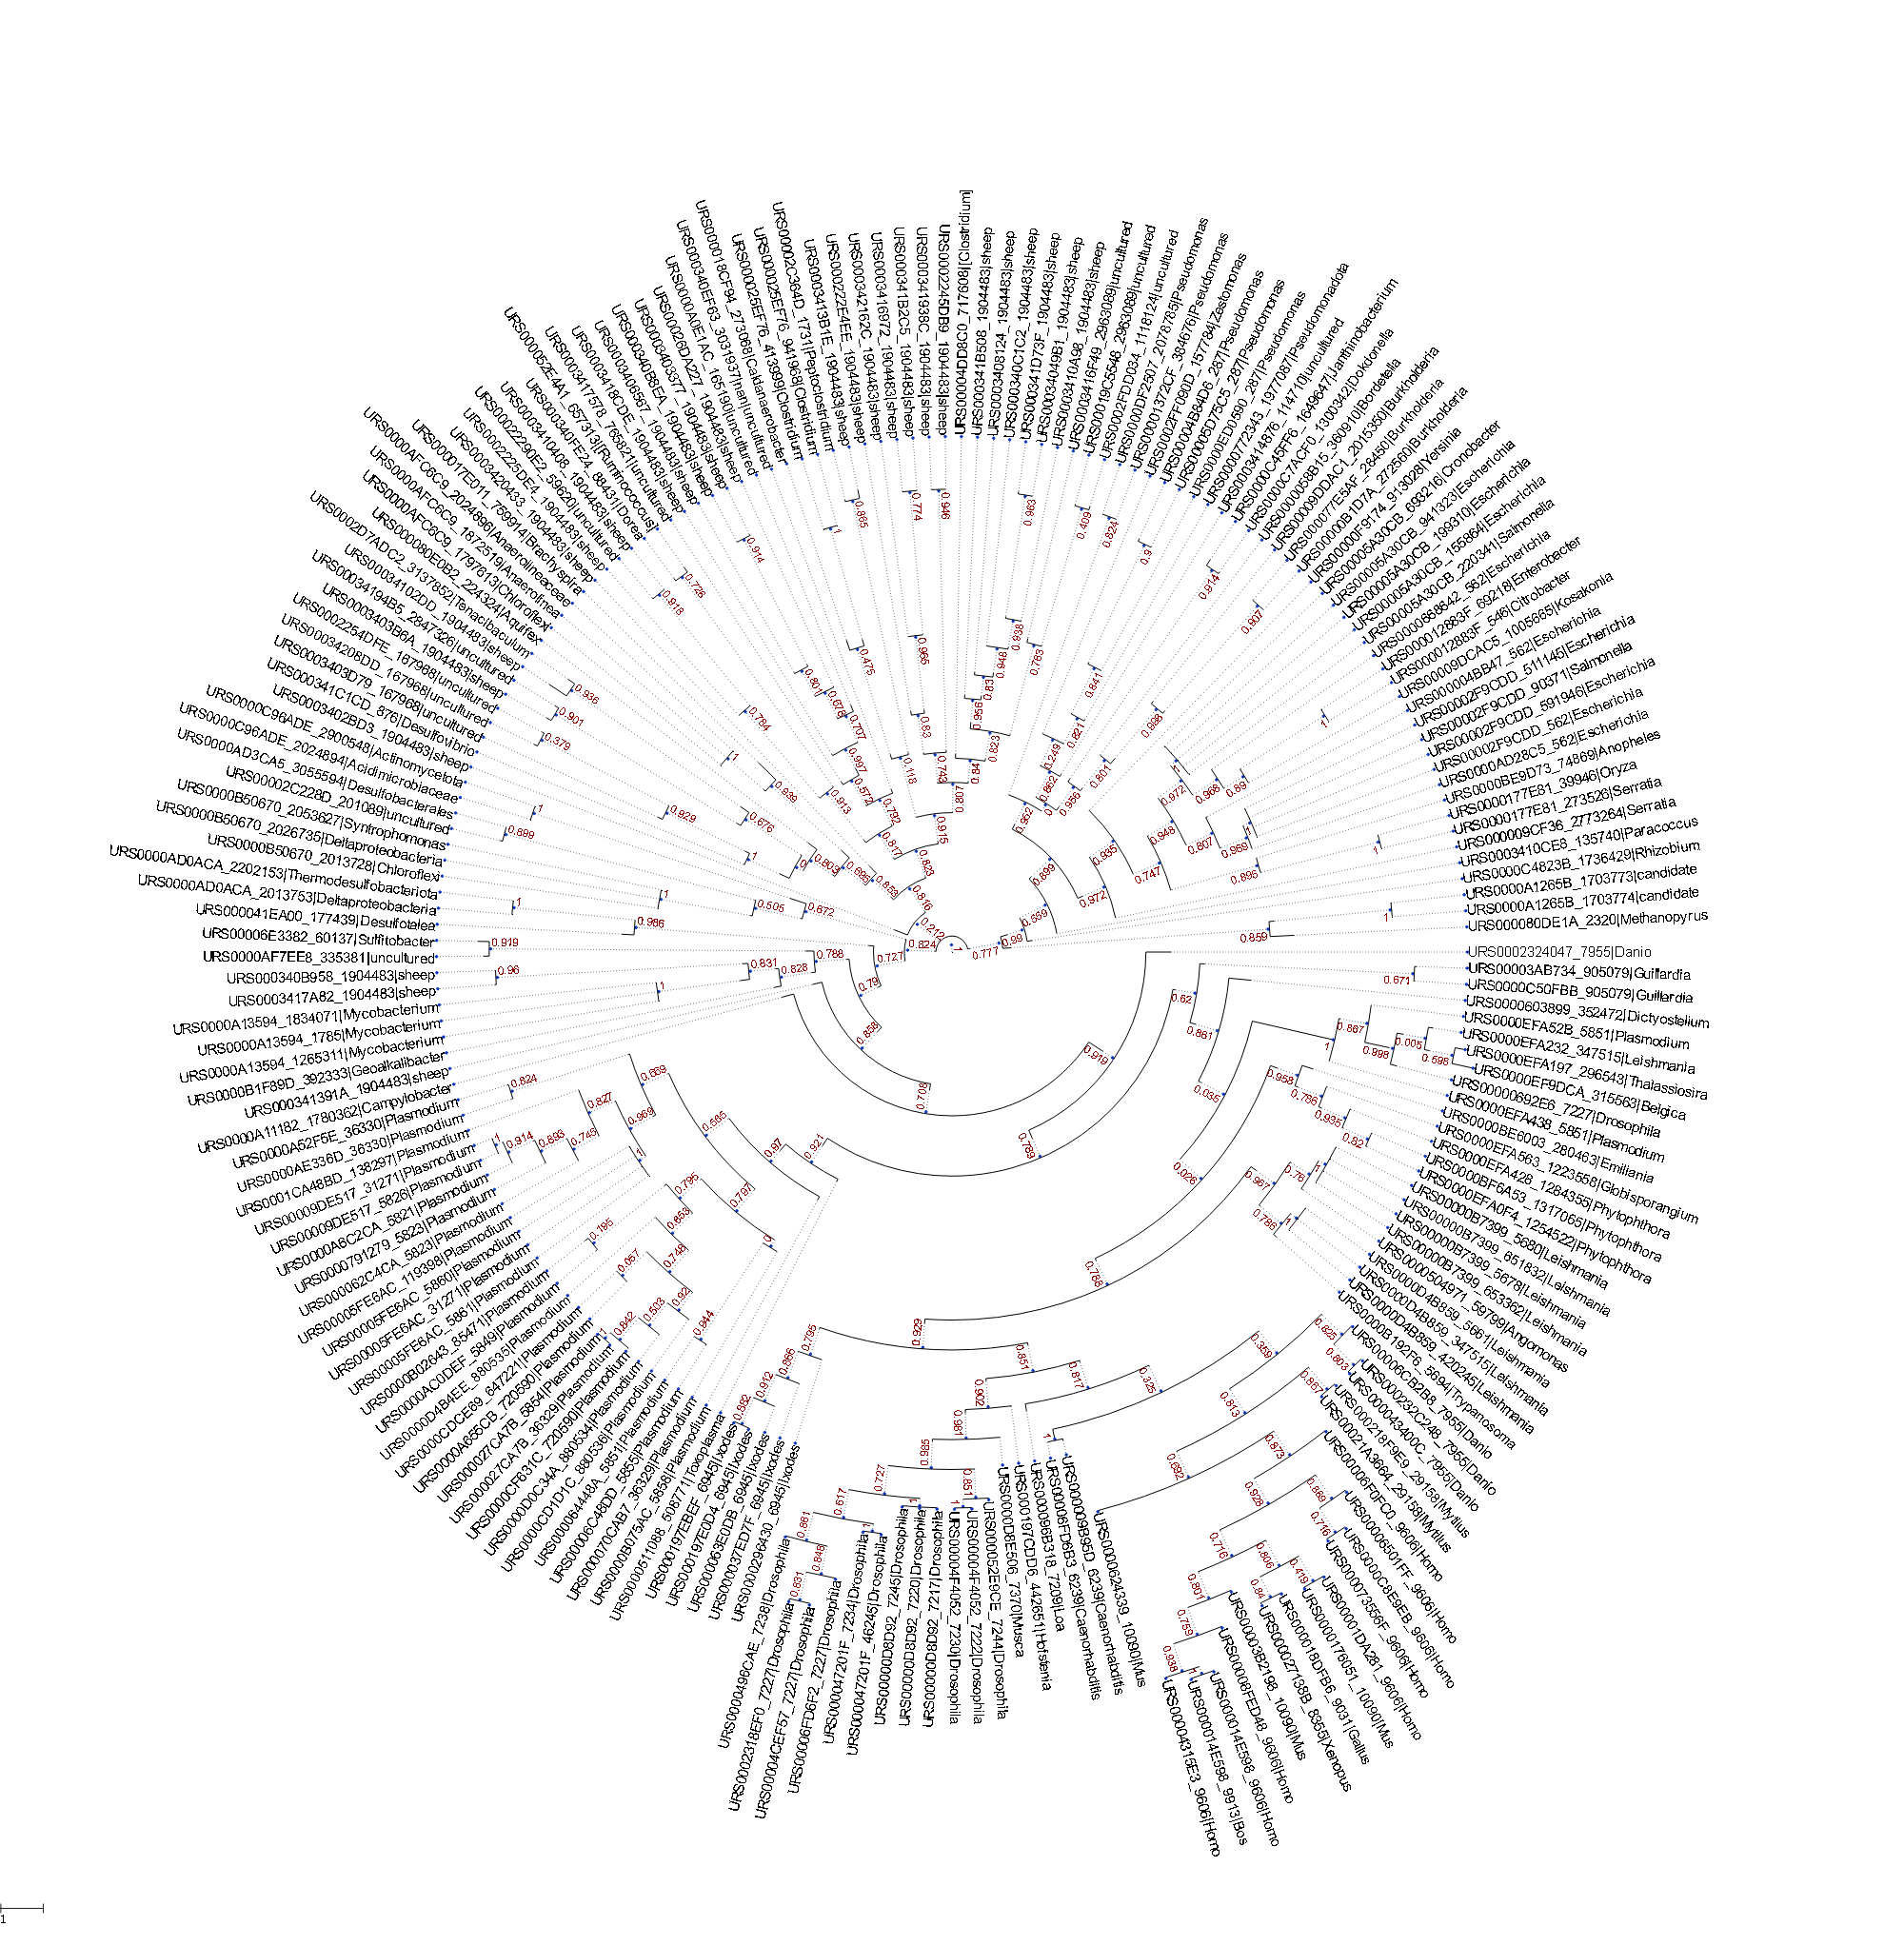

✅ Informe generado en: tree_report.md


In [7]:
if __name__ == "__main__":
    # 1. Convertir CSV a FASTA
    convert_csv_to_fasta(input_file, output_fasta)

    # 2. Alineamiento MUSCLE
    if os.path.exists(output_fasta):
        run_muscle_alignment(output_fasta, alignment_file)
    
    # 3. Construcción del árbol
    if os.path.exists(alignment_file):
        build_phylogenetic_tree(alignment_file, tree_file)
        
    # 4. Visualización del árbol
    if os.path.exists(tree_file):
        visualize_tree_radial(tree_file, out_image="tRNA_tree_radial.png")

    # 5. Interpretación automática
    if os.path.exists(tree_file):
        interpret_tree_markdown(tree_file)

In [19]:
import os
import pandas as pd
import subprocess
from Bio import Phylo
import matplotlib.pyplot as plt
from collections import Counter
from ete3 import Tree, TreeStyle
from IPython.display import Image, display
import re 

# =====================================================
# 🔧 Configuración de rutas
# =====================================================

# Archivos de entrada/salida
input_file = "../data/raw/200_trna_sec.csv"
output_fasta = "../data/processed/tRNA_sequences.fasta"
alignment_file = "tRNA_alignment.fasta"
tree_file = "tRNA_phylogenetic_tree.nhx"

# Ejecutables externos (ajusta según tu instalación)
muscle_exe = r"C:\Program Files\MUSCLE\muscle.exe"
fasttree_exe = r"C:\Program Files\FastTree\FastTree.exe"

# =====================================================
# 1. Convertir CSV a FASTA
# =====================================================
def convert_csv_to_fasta(csv_path, fasta_path):
    """
    Convierte el archivo CSV a FASTA, priorizando el nombre científico
    de la columna 'description' para una taxonomía más precisa y
    manejando etiquetas confusas como 'sheep'.
    """
    try:
        df = pd.read_csv(csv_path)
        with open(fasta_path, "w") as fasta_file:
            for index, row in df.iterrows():
                species_name = row['species']
                description = row['description']
                
                # Patrón 1: Buscar nombre científico de dos palabras en la descripción
                match_two_words = re.search(r'([A-Z][a-z]+ [a-z]+)', description)
                if match_two_words:
                    species_name = match_two_words.group(1)
                else:
                    # Patrón 2: Buscar nombre científico de una sola palabra
                    match_one_word = re.search(r'([A-Z][a-z]+)', description)
                    if match_one_word:
                        species_name = match_one_word.group(1)
                
                # Nueva regla: si el nombre original es todo minúsculas,
                # usa la descripción completa
                if species_name and species_name.islower():
                    species_name = description
                
                header = f">{row['URS_ID']}|{species_name}|{description}"
                sequence = row['Sequence']
                fasta_file.write(f"{header}\n{sequence}\n")
        print(f"✅ Archivo FASTA creado en: {fasta_path}")
    except FileNotFoundError:
        print(f"❌ Error: El archivo {csv_path} no fue encontrado.")
    except Exception as e:
        print(f"❌ Ocurrió un error al convertir a FASTA: {e}")


# =====================================================
# 2. Alineamiento con MUSCLE
# =====================================================
def run_muscle_alignment(input_fasta, output_alignment):
    """Ejecuta MUSCLE v5 para el alineamiento múltiple usando subprocess."""
    if not os.path.exists(input_fasta):
        print(f"❌ Error: El archivo de entrada FASTA '{input_fasta}' no existe.")
        return
    
    print("⏳ Ejecutando MUSCLE (v5) para el alineamiento múltiple...")

    try:
        subprocess.run(
            [muscle_exe, "-align", input_fasta, "-output", output_alignment],
            check=True
        )
        if os.path.exists(output_alignment) and os.path.getsize(output_alignment) > 0:
            print(f"✅ Alineamiento guardado en: {output_alignment}")
        else:
            print("❌ Error: MUSCLE no generó salida.")
    except subprocess.CalledProcessError as e:
        print(f"❌ Error ejecutando MUSCLE: {e}")
    except FileNotFoundError:
        print(f"❌ No se encontró MUSCLE en la ruta: {muscle_exe}")

# =====================================================
# 3. Construcción del Árbol con FastTree
# =====================================================

def build_phylogenetic_tree(input_alignment, output_tree):
    """
    Construye un árbol filogenético usando FastTree.
    """
    if not os.path.exists(input_alignment):
        print(f"❌ Error: El archivo de alineamiento '{input_alignment}' no existe.")
        return
    
    print("⏳ Construyendo el árbol filogenético con FastTree...")
    try:
        subprocess.run(
            [fasttree_exe, "-nt", input_alignment, ">", output_tree],
            shell=True,
            check=True
        )
        if os.path.exists(output_tree) and os.path.getsize(output_tree) > 0:
            print(f"✅ Árbol guardado en: {output_tree}")
        else:
            print("❌ Error: FastTree no generó salida.")
    except subprocess.CalledProcessError as e:
        print(f"❌ Error ejecutando FastTree: {e}")
    except FileNotFoundError:
        print(f"❌ No se encontró FastTree en la ruta: {fasttree_exe}")


def visualize_tree_radial(tree_file, out_image="tree_radial.png"):
    """Visualiza el árbol filogenético en formato radial usando ete3, guarda PNG y lo muestra en Jupyter."""
    if not os.path.exists(tree_file):
        print(f"❌ Error: El archivo de árbol '{tree_file}' no existe.")
        return
    
    print("📊 Visualizando el árbol filogenético en formato radial...")

    t = Tree(tree_file)

    ts = TreeStyle()
    ts.mode = "c"       # circular
    ts.show_leaf_name = True
    ts.show_branch_support = True
    ts.scale = 50

    # 1. Guardar la imagen como antes
    t.render(out_image, tree_style=ts, w=2000, units="px")
    print(f"✅ Imagen radial del árbol guardada en: {out_image}")

    # 2. **Mostrar la imagen en la celda de Jupyter Notebook**
    display(Image(filename=out_image))

# =====================================================
# 4. Visualización del Árbol
# =====================================================
def visualize_tree(tree_file, out_image="tree.png"):
    """Carga y dibuja el árbol filogenético con Biopython."""
    if not os.path.exists(tree_file):
        print(f"❌ Error: El archivo de árbol '{tree_file}' no existe.")
        return
    
    print("📊 Visualizando el árbol filogenético...")
    tree = Phylo.read(tree_file, "newick")

    # Dibujo en pantalla
    fig = plt.figure(figsize=(10, 20))  # Ajusta tamaño según la cantidad de secuencias
    axes = fig.add_subplot(1, 1, 1)
    Phylo.draw(tree, axes=axes, do_show=False)
    plt.tight_layout()
    plt.show()

    # Guardar como imagen
    fig.savefig(out_image, dpi=300, bbox_inches="tight")
    print(f"✅ Imagen del árbol guardada en: {out_image}")


def is_subclade(clade_a, clade_b):
    """Verifica si el clado A es un subclado de B."""
    leaves_a = set(clade_a.get_terminals())
    leaves_b = set(clade_b.get_terminals())
    return leaves_a.issubset(leaves_b) and leaves_a != leaves_b

def find_maximal_clades(all_clades):
    """
    Filtra una lista de clados para encontrar solo los "maximales" o más inclusivos.
    
    Un clado maximal es aquel que no es un subclado de ningún otro clado en la lista.
    """
    maximal_clades = []
    
    # Ordenar los clados por tamaño de forma descendente para una búsqueda más eficiente
    all_clades.sort(key=lambda c: len(c.get_terminals()), reverse=True)
    
    for i, candidate_clade in enumerate(all_clades):
        is_maximal = True
        # Comparar con clados más grandes (ya que están ordenados)
        for j in range(i):
            if is_subclade(candidate_clade, all_clades[j]):
                is_maximal = False
                break
        if is_maximal:
            maximal_clades.append(candidate_clade)
            
    return maximal_clades


# =====================================================
# 5. Interpretación automática del Árbol
# =====================================================
def interpret_tree_markdown(tree_file, min_clade_size=4, support_cutoff=0.7, report_file="tree_report.md"):
    """
    Interpreta un árbol filogenético y genera un informe Markdown.
    
    - min_clade_size: número mínimo de secuencias para considerar un clado.
    - support_cutoff: bootstrap mínimo para reportar un clado.
    """
    if not os.path.exists(tree_file):
        print(f"❌ Error: No existe {tree_file}")
        return
    
    tree = Phylo.read(tree_file, "newick")
    leaves = tree.get_terminals()
    n_total = len(leaves)

    report = []
    report.append(f"# 📖 Interpretación automática del árbol filogenético\n")
    report.append(f"- Número total de secuencias: **{n_total}**\n")
    
    # --- Conteo global de especies
    species = [str(leaf).split("|")[1].strip() for leaf in leaves if "|" in str(leaf)]
    sp_counts = Counter(species)
    report.append("## 🧾 Especies más frecuentes\n")
    for sp, c in sp_counts.most_common(10):
        report.append(f"- {sp}: {c} secuencias")

    # --- Pre-filtrar y encontrar clados maximales
    valid_clades = []
    for clade in tree.get_nonterminals():
        if hasattr(clade, "confidence") and clade.confidence is not None and clade.confidence < support_cutoff:
            continue
        sub_leaves = clade.get_terminals()
        if len(sub_leaves) < min_clade_size or len(sub_leaves) == n_total:
            continue
        valid_clades.append(clade)
    
    maximal_clades = find_maximal_clades(valid_clades)

    # --- Reportar clados monoespecíficos
    report.append("\n## 🌱 Clados monoespecíficos grandes\n")
    found_mono = False
    for clade in maximal_clades:
        sub_species = [str(leaf).split("|")[1].strip() for leaf in clade.get_terminals() if "|" in str(leaf)]
        sp_counts = Counter(sub_species)

        if len(sp_counts) == 1:  # solo una especie
            sp = list(sp_counts.keys())[0]
            confidence_str = f"{clade.confidence:.2f}" if clade.confidence is not None else "N/A"
            report.append(f"- {sp}: {len(clade.get_terminals())} secuencias (bootstrap={confidence_str})")
            ejemplos = [str(x) for x in clade.get_terminals()[:3]]
            report.append(f"  - Ejemplos: {ejemplos}")
            found_mono = True
    if not found_mono:
        report.append("No se encontraron clados monoespecíficos que cumplan los criterios.")

    # --- Reportar clados mixtos
    report.append("\n## 🔀 Clados mixtos interesantes\n")
    found_mixed = False
    for clade in maximal_clades:
        sub_species = [str(leaf).split("|")[1].strip() for leaf in clade.get_terminals() if "|" in str(leaf)]
        sp_counts = Counter(sub_species)

        if len(sp_counts) > 1:
            confidence_str = f"{clade.confidence:.2f}" if clade.confidence is not None else "N/A"
            report.append(f"- Clado con {len(clade.get_terminals())} secuencias y {len(sp_counts)} especies (bootstrap={confidence_str})")
            for sp, c in sp_counts.most_common(3):
                report.append(f"  - {sp}: {c} secuencias")
            ejemplos = [str(x) for x in clade.get_terminals()[:3]]
            report.append(f"  - Ejemplos: {ejemplos}")
            found_mixed = True
    if not found_mixed:
        report.append("No se encontraron clados mixtos que cumplan los criterios.")

    # --- Secuencias divergentes
    report.append("\n## 🌍 Secuencias divergentes / posibles outgroups\n")
    long_branches = sorted([(leaf, leaf.branch_length) for leaf in leaves if leaf.branch_length],
                             key=lambda x: x[1], reverse=True)[:10]
    for leaf, length in long_branches:
        report.append(f"- {leaf} (rama larga: {length:.3f})")

    # --- Guardar a archivo
    with open(report_file, "w", encoding="utf-8") as f:
        f.write("\n".join(report))

    print(f"✅ Informe generado en: {report_file}")


✅ Archivo FASTA creado en: ../data/processed/tRNA_sequences.fasta
⏳ Ejecutando MUSCLE (v5) para el alineamiento múltiple...
✅ Alineamiento guardado en: tRNA_alignment.fasta
⏳ Construyendo el árbol filogenético con FastTree...
✅ Árbol guardado en: tRNA_phylogenetic_tree.nhx
📊 Visualizando el árbol filogenético en formato radial...
✅ Imagen radial del árbol guardada en: tRNA_tree_radial.png


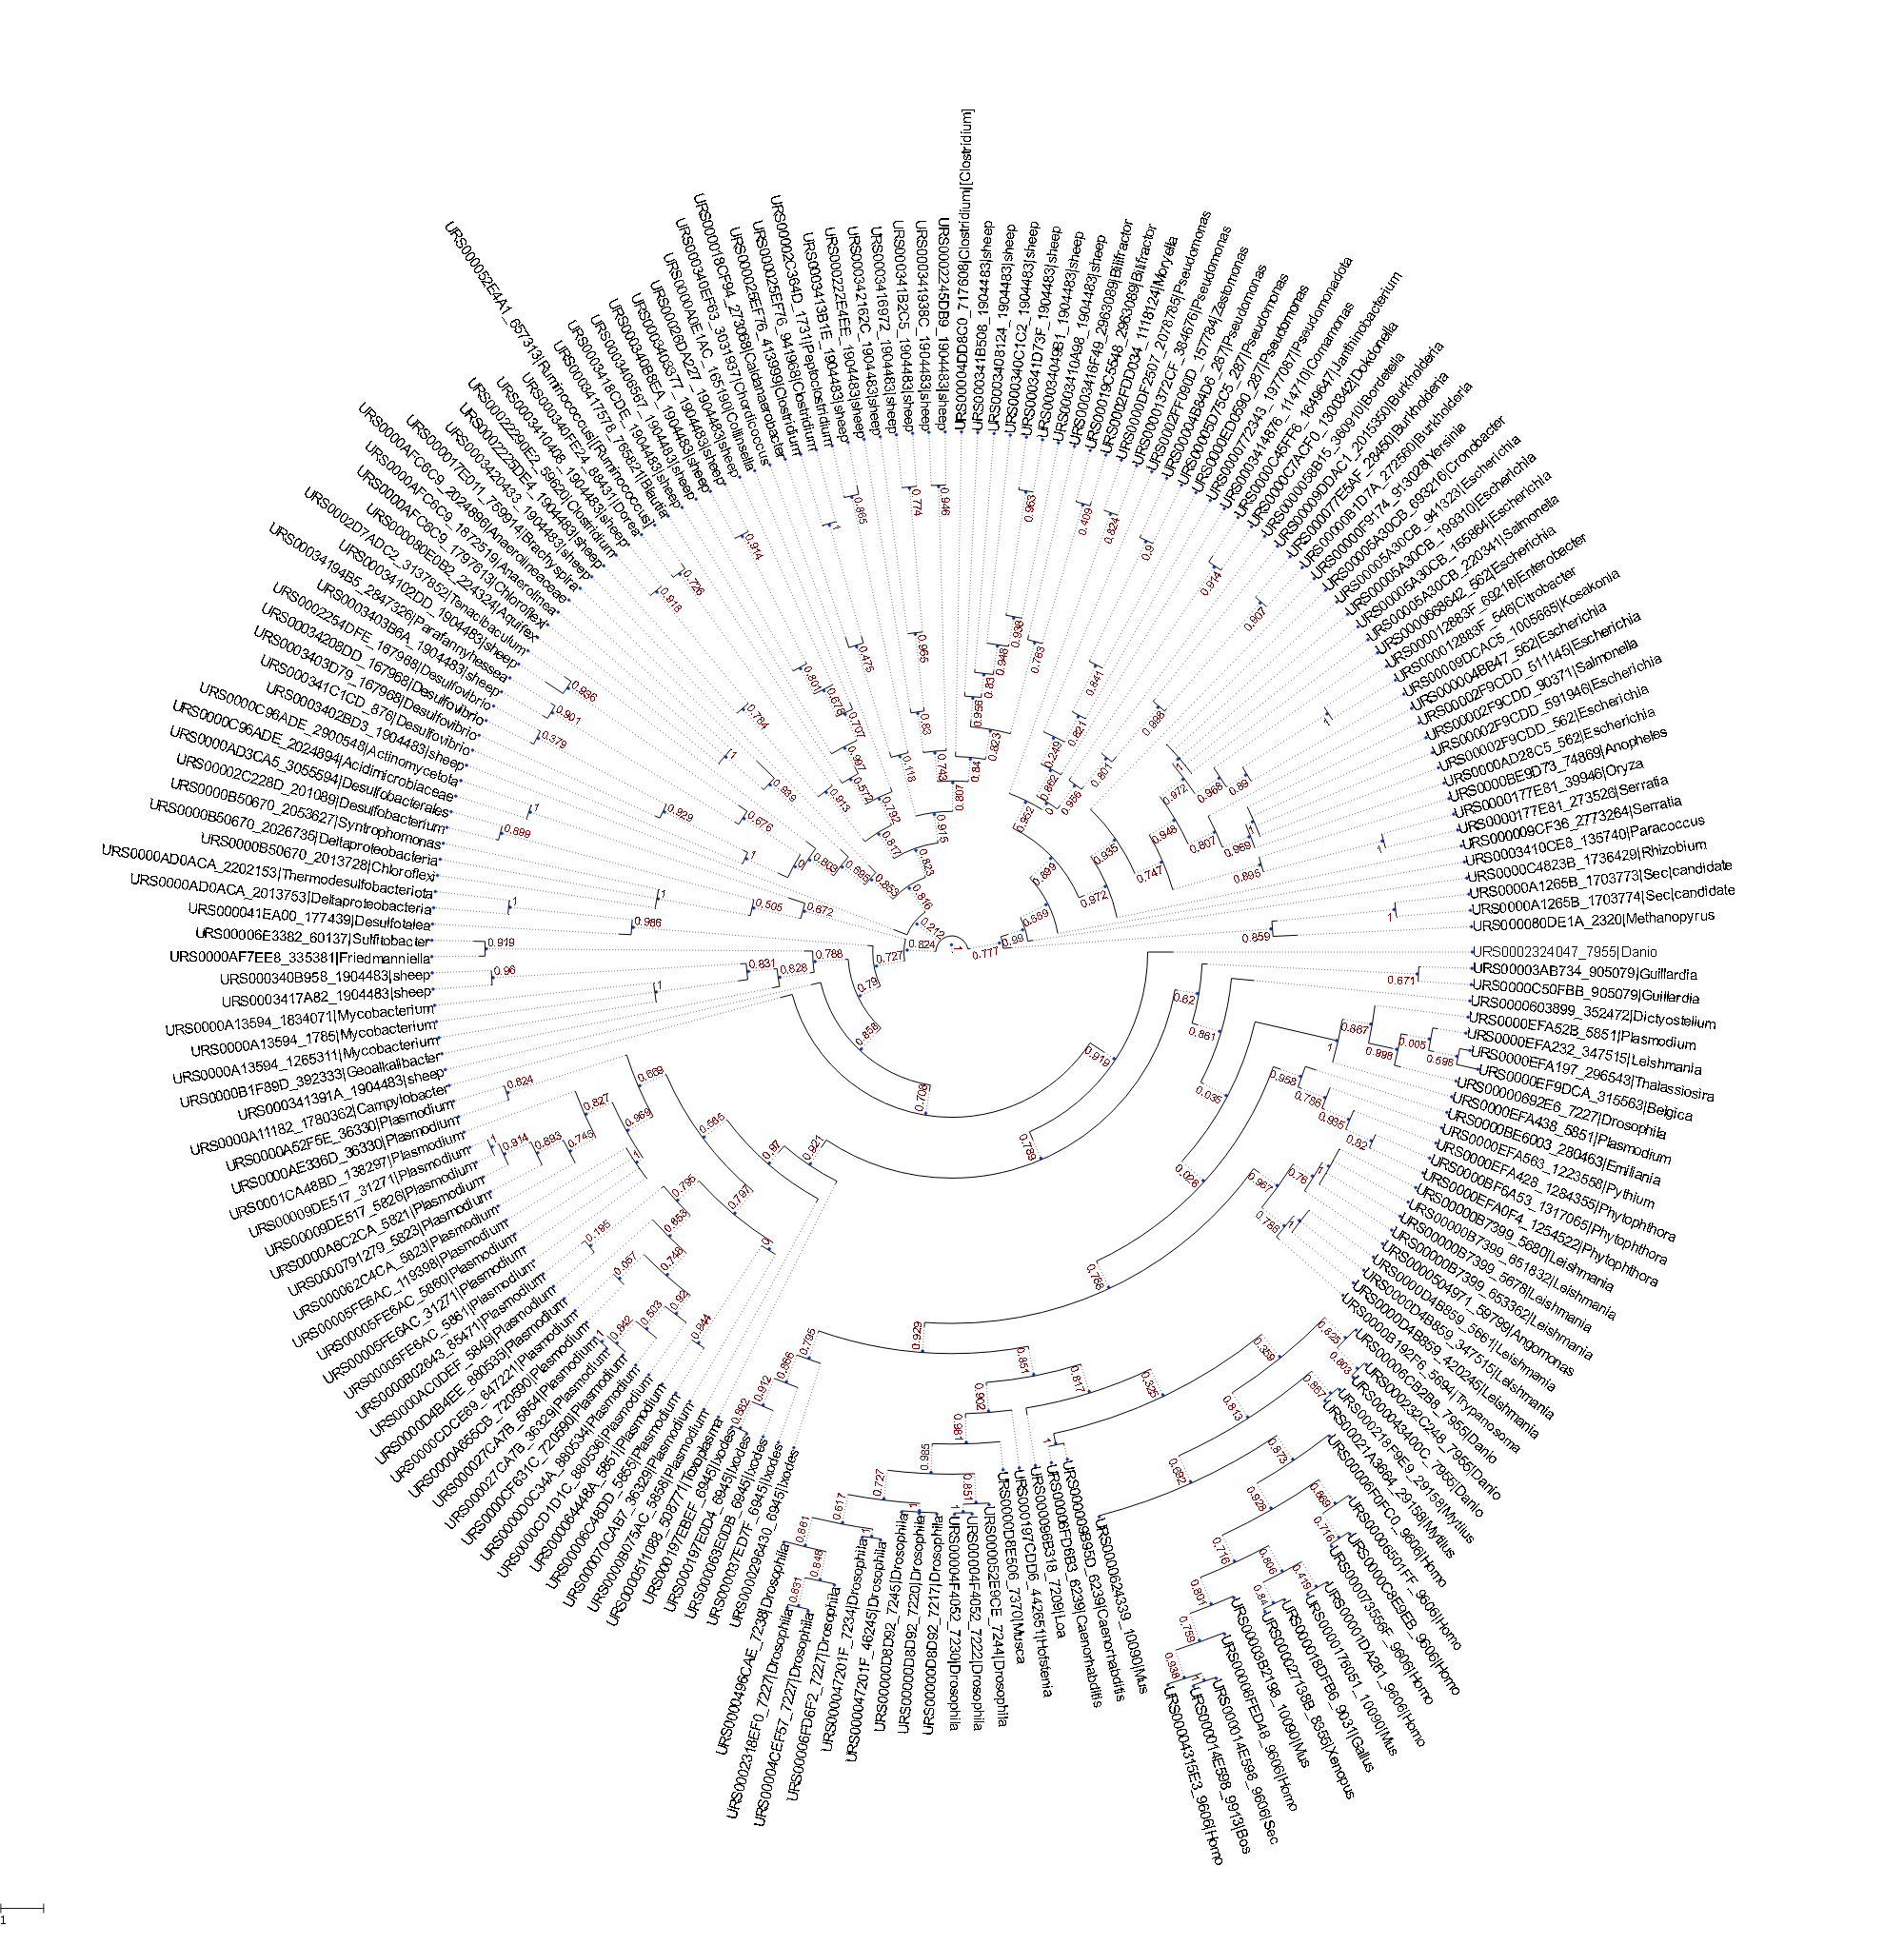

✅ Informe generado en: tree_report.md


In [20]:
if __name__ == "__main__":
    # 1. Convertir CSV a FASTA
    convert_csv_to_fasta(input_file, output_fasta)

    # 2. Alineamiento MUSCLE
    if os.path.exists(output_fasta):
        run_muscle_alignment(output_fasta, alignment_file)
    
    # 3. Construcción del árbol
    if os.path.exists(alignment_file):
        build_phylogenetic_tree(alignment_file, tree_file)
        
    # 4. Visualización del árbol
    if os.path.exists(tree_file):
        visualize_tree_radial(tree_file, out_image="tRNA_tree_radial.png")

    # 5. Interpretación automática
    if os.path.exists(tree_file):
        interpret_tree_markdown(tree_file)

✅ Archivo FASTA creado en: ../data/processed/tRNA_sequences.fasta
✅ Mapping de nombres guardado en: id_mapping.csv
⏳ Ejecutando MUSCLE (v5) para el alineamiento múltiple...
✅ Alineamiento guardado en: tRNA_alignment.fasta
⏳ Construyendo el árbol filogenético con FastTree...
✅ Árbol guardado en: tRNA_phylogenetic_tree.nhx
📊 Visualizando el árbol filogenético en formato radial...
✅ Imagen radial del árbol guardada en: tRNA_tree_radial.png


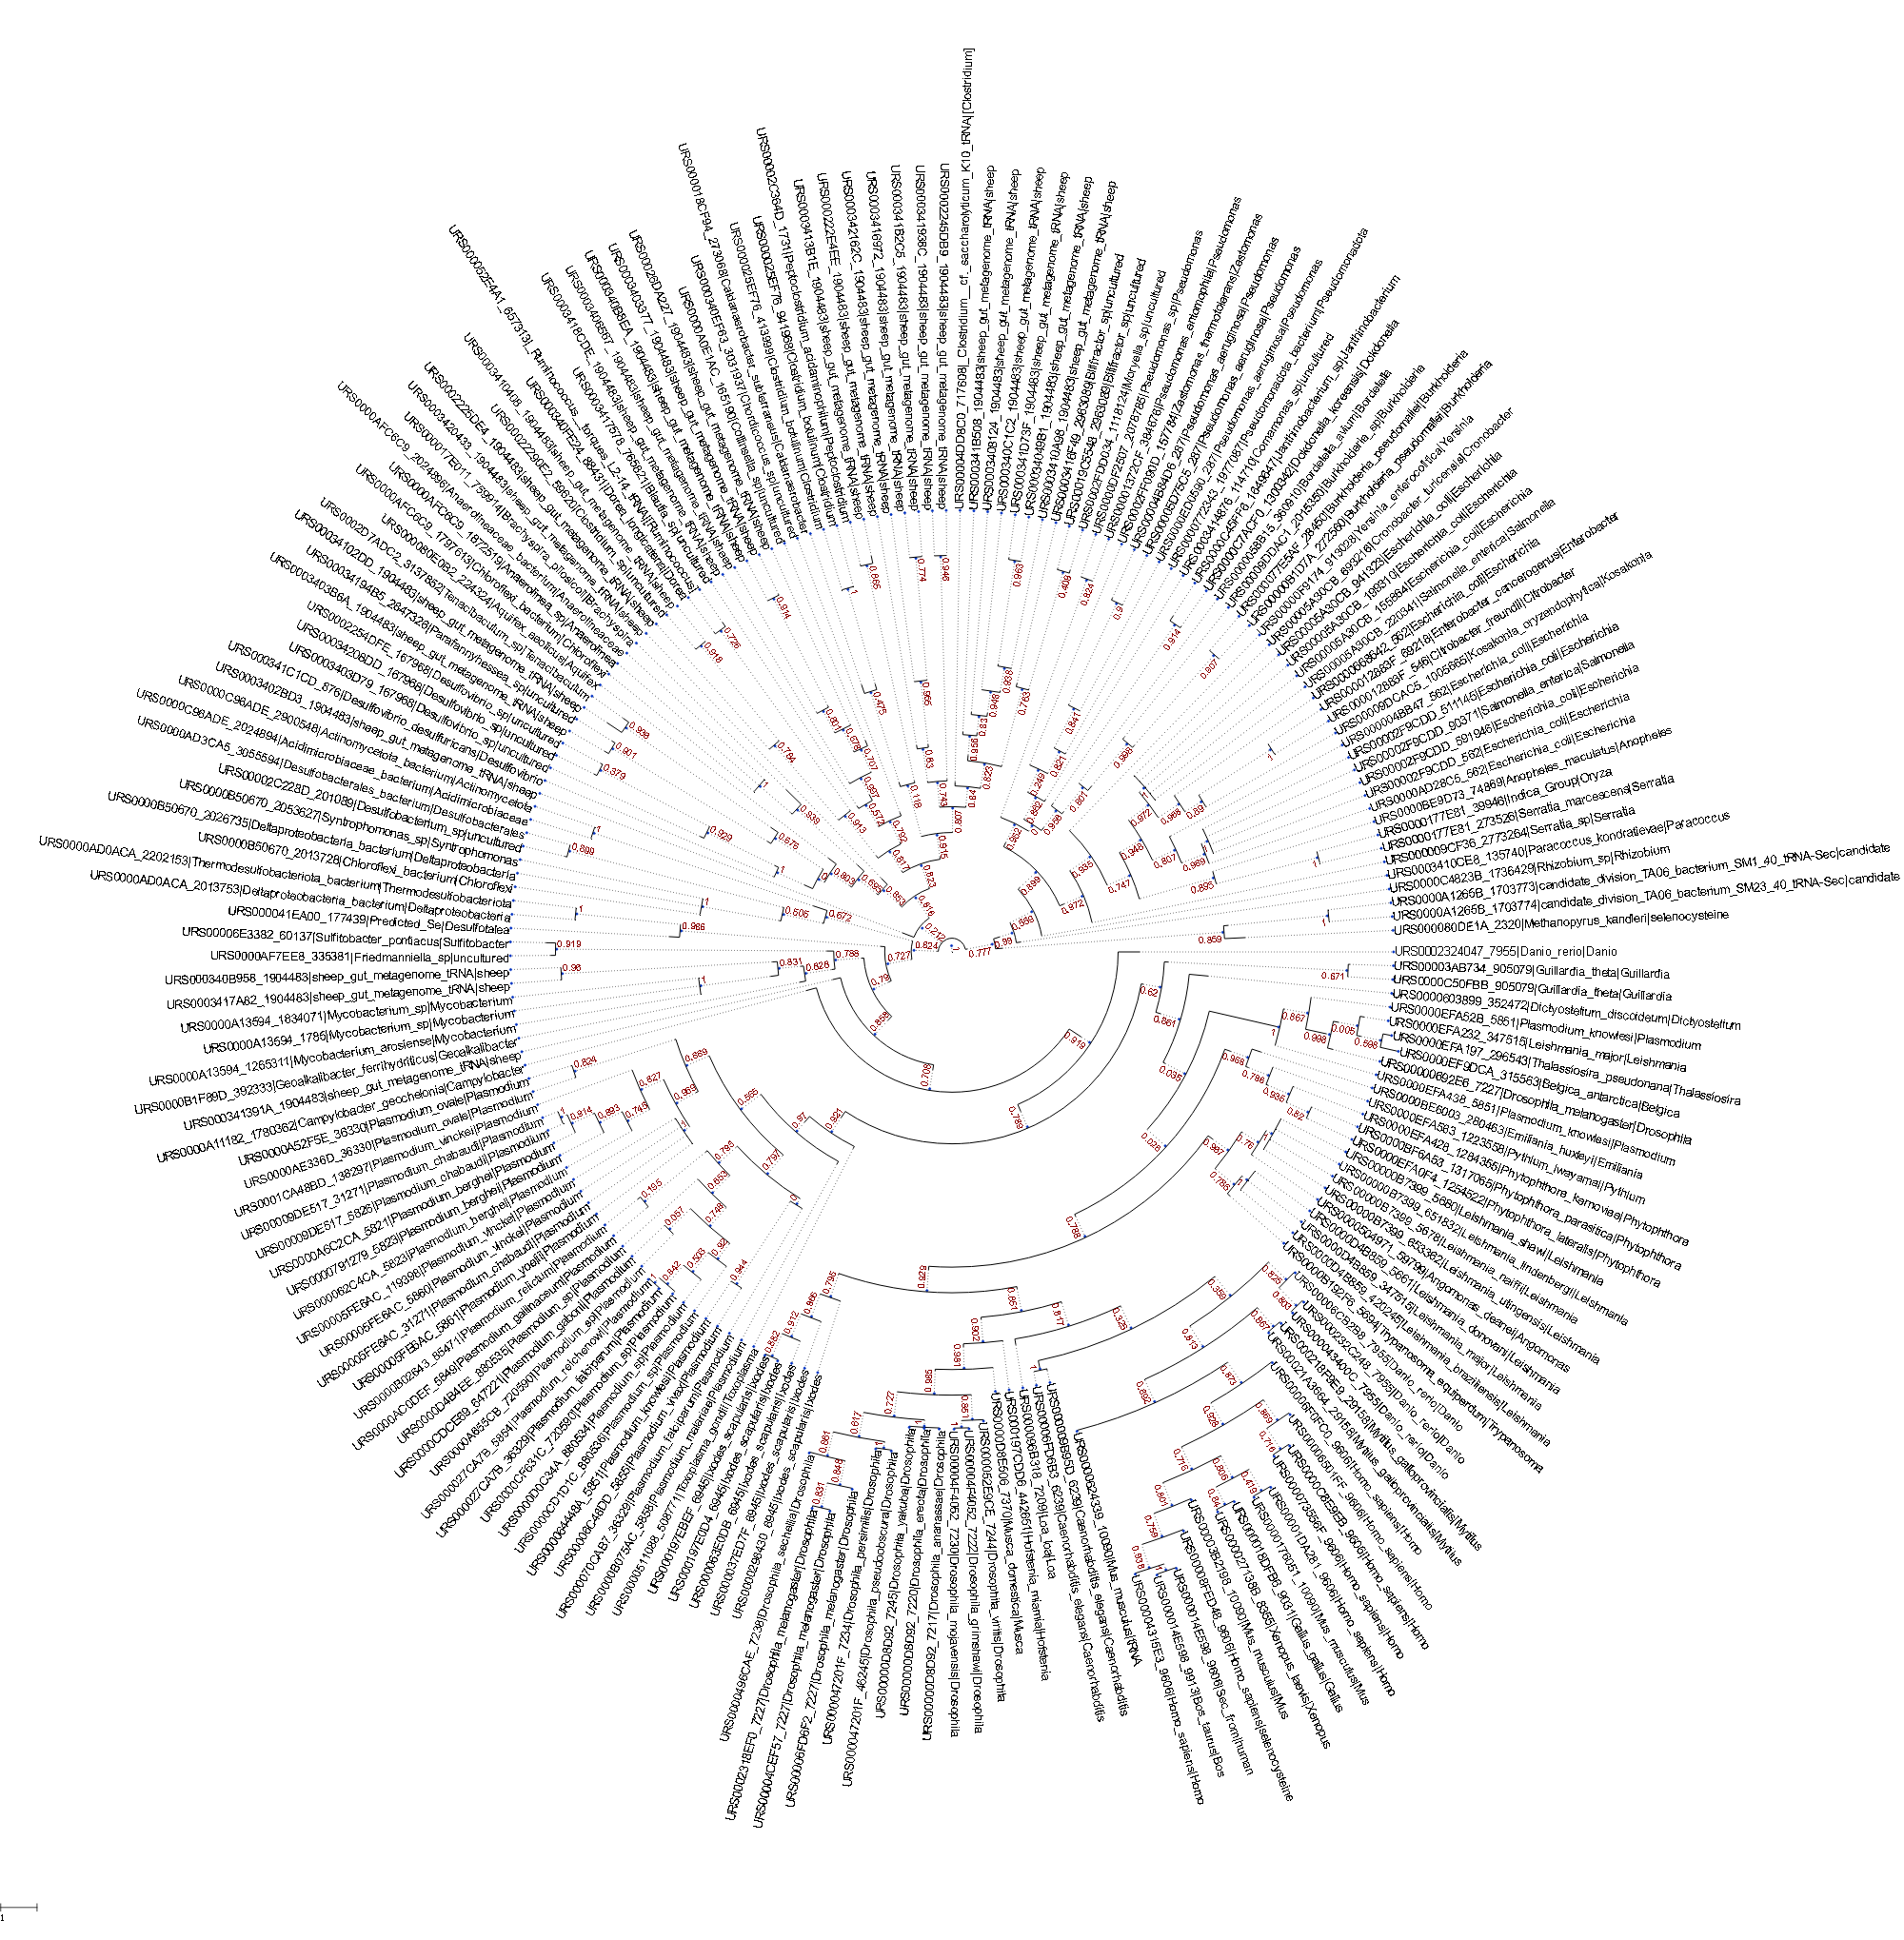

✅ Informe generado en: tree_report.md


In [30]:
import os
import pandas as pd
import subprocess
from Bio import Phylo
import matplotlib.pyplot as plt
from collections import Counter
from ete3 import Tree, TreeStyle
from IPython.display import Image, display
import re

# =====================================================
# 🔧 Configuración de rutas
# =====================================================

# Archivos de entrada/salida
input_file = "../data/raw/200_trna_sec.csv"
output_fasta = "../data/processed/tRNA_sequences.fasta"
alignment_file = "tRNA_alignment.fasta"
tree_file = "tRNA_phylogenetic_tree.nhx"

# Ejecutables externos (ajusta según tu instalación)
muscle_exe = r"C:\Program Files\MUSCLE\muscle.exe"
fasttree_exe = r"C:\Program Files\FastTree\FastTree.exe"

# =====================================================
# 1. Convertir CSV a FASTA (Versión Mejorada)
# =====================================================
def convert_csv_to_fasta(csv_path, fasta_path, mapping_file="id_mapping.csv"):
    """
    Convierte CSV a FASTA:
    - Extrae un nombre taxonómico lo más informativo posible.
    - Reemplaza espacios/caracteres raros por '_' para que FastTree no los corte.
    - Guarda también un mapping CSV para recuperar los nombres originales.
    """
    try:
        df = pd.read_csv(csv_path)
        mapping = []  # Para guardar URS_ID -> nombres originales

        with open(fasta_path, "w") as fasta_file:
            for _, row in df.iterrows():
                urs_id = str(row['URS_ID']).strip()
                description = str(row['description']).strip()

                species_name = None

                # Caso 1: binomial clásico (Genus species)
                match_binomial = re.search(r'([A-Z][a-z]+ [a-z]+)', description)
                if match_binomial:
                    species_name = match_binomial.group(1)

                # Caso 2: nombres con 2 mayúsculas seguidas (ej. Candidatus Liberibacter asiaticus)
                match_candidatus = re.search(r'([A-Z][a-z]+ [A-Z][a-z]+(?: [a-z]+)?)', description)
                if match_candidatus:
                    species_name = match_candidatus.group(1)

                # Caso 3: fallback -> usar toda la descripción
                if not species_name:
                    species_name = description

                # --- Saneamiento para FastTree (sin espacios, solo safe chars)
                safe_species = re.sub(r"[^A-Za-z0-9_.-]", "_", species_name)

                # Header FASTA con safe_species (para FastTree) + descripción completa (para interpretar)
                header = f">{urs_id}|{safe_species}|{description}"
                sequence = str(row['Sequence']).strip()
                fasta_file.write(f"{header}\n{sequence}\n")

                # Guardamos en el mapping para volver a expandir después
                mapping.append([urs_id, safe_species, description])

        # Exportamos mapping a CSV
        pd.DataFrame(mapping, columns=["URS_ID", "safe_species", "description"]).to_csv(mapping_file, index=False)

        print(f"✅ Archivo FASTA creado en: {fasta_path}")
        print(f"✅ Mapping de nombres guardado en: {mapping_file}")

    except Exception as e:
        print(f"❌ Error al convertir a FASTA: {e}")

# =====================================================
# 2. Alineamiento con MUSCLE
# =====================================================
def run_muscle_alignment(input_fasta, output_alignment):
    """Ejecuta MUSCLE v5 para el alineamiento múltiple usando subprocess."""
    if not os.path.exists(input_fasta):
        print(f"❌ Error: El archivo de entrada FASTA '{input_fasta}' no existe.")
        return
    
    print("⏳ Ejecutando MUSCLE (v5) para el alineamiento múltiple...")

    try:
        subprocess.run(
            [muscle_exe, "-align", input_fasta, "-output", output_alignment],
            check=True
        )
        if os.path.exists(output_alignment) and os.path.getsize(output_alignment) > 0:
            print(f"✅ Alineamiento guardado en: {output_alignment}")
        else:
            print("❌ Error: MUSCLE no generó salida.")
    except subprocess.CalledProcessError as e:
        print(f"❌ Error ejecutando MUSCLE: {e}")
    except FileNotFoundError:
        print(f"❌ No se encontró MUSCLE en la ruta: {muscle_exe}")

# =====================================================
# 3. Construcción del Árbol con FastTree
# =====================================================

def build_phylogenetic_tree(input_alignment, output_tree):
    """
    Construye un árbol filogenético usando FastTree.
    """
    if not os.path.exists(input_alignment):
        print(f"❌ Error: El archivo de alineamiento '{input_alignment}' no existe.")
        return
    
    print("⏳ Construyendo el árbol filogenético con FastTree...")
    try:
        subprocess.run(
            [fasttree_exe, "-nt", input_alignment, ">", output_tree],
            shell=True,
            check=True
        )
        if os.path.exists(output_tree) and os.path.getsize(output_tree) > 0:
            print(f"✅ Árbol guardado en: {output_tree}")
        else:
            print("❌ Error: FastTree no generó salida.")
    except subprocess.CalledProcessError as e:
        print(f"❌ Error ejecutando FastTree: {e}")
    except FileNotFoundError:
        print(f"❌ No se encontró FastTree en la ruta: {fasttree_exe}")


def visualize_tree_radial(tree_file, out_image="tree_radial.png"):
    """Visualiza el árbol filogenético en formato radial usando ete3, guarda PNG y lo muestra en Jupyter."""
    if not os.path.exists(tree_file):
        print(f"❌ Error: El archivo de árbol '{tree_file}' no existe.")
        return
    
    print("📊 Visualizando el árbol filogenético en formato radial...")

    t = Tree(tree_file)

    ts = TreeStyle()
    ts.mode = "c"       # circular
    ts.show_leaf_name = True
    ts.show_branch_support = True
    ts.scale = 50

    # 1. Guardar la imagen como antes
    t.render(out_image, tree_style=ts, w=2000, units="px")
    print(f"✅ Imagen radial del árbol guardada en: {out_image}")

    # 2. **Mostrar la imagen en la celda de Jupyter Notebook**
    display(Image(filename=out_image))

# =====================================================
# 4. Visualización del Árbol
# =====================================================
def visualize_tree(tree_file, out_image="tree.png"):
    """Carga y dibuja el árbol filogenético con Biopython."""
    if not os.path.exists(tree_file):
        print(f"❌ Error: El archivo de árbol '{tree_file}' no existe.")
        return
    
    print("📊 Visualizando el árbol filogenético...")
    tree = Phylo.read(tree_file, "newick")

    # Dibujo en pantalla
    fig = plt.figure(figsize=(10, 20))  # Ajusta tamaño según la cantidad de secuencias
    axes = fig.add_subplot(1, 1, 1)
    Phylo.draw(tree, axes=axes, do_show=False)
    plt.tight_layout()
    plt.show()

    # Guardar como imagen
    fig.savefig(out_image, dpi=300, bbox_inches="tight")
    print(f"✅ Imagen del árbol guardada en: {out_image}")


def is_subclade(clade_a, clade_b):
    """Verifica si el clado A es un subclado de B."""
    leaves_a = set(clade_a.get_terminals())
    leaves_b = set(clade_b.get_terminals())
    return leaves_a.issubset(leaves_b) and leaves_a != leaves_b

def find_maximal_clades(all_clades):
    """
    Filtra una lista de clados para encontrar solo los "maximales" o más inclusivos.
    
    Un clado maximal es aquel que no es un subclado de ningún otro clado en la lista.
    """
    maximal_clades = []
    
    # Ordenar los clados por tamaño de forma descendente para una búsqueda más eficiente
    all_clades.sort(key=lambda c: len(c.get_terminals()), reverse=True)
    
    for i, candidate_clade in enumerate(all_clades):
        is_maximal = True
        # Comparar con clados más grandes (ya que están ordenados)
        for j in range(i):
            if is_subclade(candidate_clade, all_clades[j]):
                is_maximal = False
                break
        if is_maximal:
            maximal_clades.append(candidate_clade)
            
    return maximal_clades


# =====================================================
# 5. Interpretación automática del Árbol
# =====================================================
def interpret_tree_markdown(tree_file, min_clade_size=4, support_cutoff=0.7, report_file="tree_report.md"):
    """
    Interpreta un árbol filogenético y genera un informe Markdown.
    
    - min_clade_size: número mínimo de secuencias para considerar un clado.
    - support_cutoff: bootstrap mínimo para reportar un clado.
    """
    if not os.path.exists(tree_file):
        print(f"❌ Error: No existe {tree_file}")
        return
    
    tree = Phylo.read(tree_file, "newick")
    leaves = tree.get_terminals()
    n_total = len(leaves)

    report = []
    report.append(f"# 📖 Interpretación automática del árbol filogenético\n")
    report.append(f"- Número total de secuencias: **{n_total}**\n")
    
    # --- Conteo global de especies
    species = [str(leaf).split("|")[1].strip() for leaf in leaves if "|" in str(leaf)]
    sp_counts = Counter(species)
    report.append("## 🧾 Especies más frecuentes\n")
    for sp, c in sp_counts.most_common(10):
        report.append(f"- {sp}: {c} secuencias")

    # --- Pre-filtrar y encontrar clados maximales
    valid_clades = []
    for clade in tree.get_nonterminals():
        if hasattr(clade, "confidence") and clade.confidence is not None and clade.confidence < support_cutoff:
            continue
        sub_leaves = clade.get_terminals()
        if len(sub_leaves) < min_clade_size or len(sub_leaves) == n_total:
            continue
        valid_clades.append(clade)
    
    maximal_clades = find_maximal_clades(valid_clades)

    # --- Reportar clados monoespecíficos
    report.append("\n## 🌱 Clados monoespecíficos grandes\n")
    found_mono = False
    for clade in maximal_clades:
        sub_species = [str(leaf).split("|")[1].strip() for leaf in clade.get_terminals() if "|" in str(leaf)]
        sp_counts = Counter(sub_species)

        if len(sp_counts) == 1:  # solo una especie
            sp = list(sp_counts.keys())[0]
            confidence_str = f"{clade.confidence:.2f}" if clade.confidence is not None else "N/A"
            report.append(f"- {sp}: {len(clade.get_terminals())} secuencias (bootstrap={confidence_str})")
            ejemplos = [str(x) for x in clade.get_terminals()[:3]]
            report.append(f"  - Ejemplos: {ejemplos}")
            found_mono = True
    if not found_mono:
        report.append("No se encontraron clados monoespecíficos que cumplan los criterios.")

    # --- Reportar clados mixtos
    report.append("\n## 🔀 Clados mixtos interesantes\n")
    found_mixed = False
    for clade in maximal_clades:
        sub_species = [str(leaf).split("|")[1].strip() for leaf in clade.get_terminals() if "|" in str(leaf)]
        sp_counts = Counter(sub_species)

        if len(sp_counts) > 1:
            confidence_str = f"{clade.confidence:.2f}" if clade.confidence is not None else "N/A"
            report.append(f"- Clado con {len(clade.get_terminals())} secuencias y {len(sp_counts)} especies (bootstrap={confidence_str})")
            for sp, c in sp_counts.most_common(3):
                report.append(f"  - {sp}: {c} secuencias")
            ejemplos = [str(x) for x in clade.get_terminals()[:3]]
            report.append(f"  - Ejemplos: {ejemplos}")
            found_mixed = True
    if not found_mixed:
        report.append("No se encontraron clados mixtos que cumplan los criterios.")

    # --- Secuencias divergentes
    report.append("\n## 🌍 Secuencias divergentes / posibles outgroups\n")
    long_branches = sorted([(leaf, leaf.branch_length) for leaf in leaves if leaf.branch_length],
                             key=lambda x: x[1], reverse=True)[:10]
    for leaf, length in long_branches:
        report.append(f"- {leaf} (rama larga: {length:.3f})")

    # --- Guardar a archivo
    with open(report_file, "w", encoding="utf-8") as f:
        f.write("\n".join(report))

    print(f"✅ Informe generado en: {report_file}")

if __name__ == "__main__":
    # 1. Convertir CSV a FASTA
    convert_csv_to_fasta(input_file, output_fasta)

    # 2. Alineamiento MUSCLE
    if os.path.exists(output_fasta):
        run_muscle_alignment(output_fasta, alignment_file)
    
    # 3. Construcción del árbol
    if os.path.exists(alignment_file):
        build_phylogenetic_tree(alignment_file, tree_file)
        
    # 4. Visualización del árbol
    if os.path.exists(tree_file):
        visualize_tree_radial(tree_file, out_image="tRNA_tree_radial.png")

    # 5. Interpretación automática
    if os.path.exists(tree_file):
        interpret_tree_markdown(tree_file)

c:\Users\ro-ma\anaconda3\Lib\site-packages\logomaker\src\error_handling.py:58: UserWarning:  Warning: Character 'N' is not in color_dict. Using black.
  warnings.warn(str(Error))


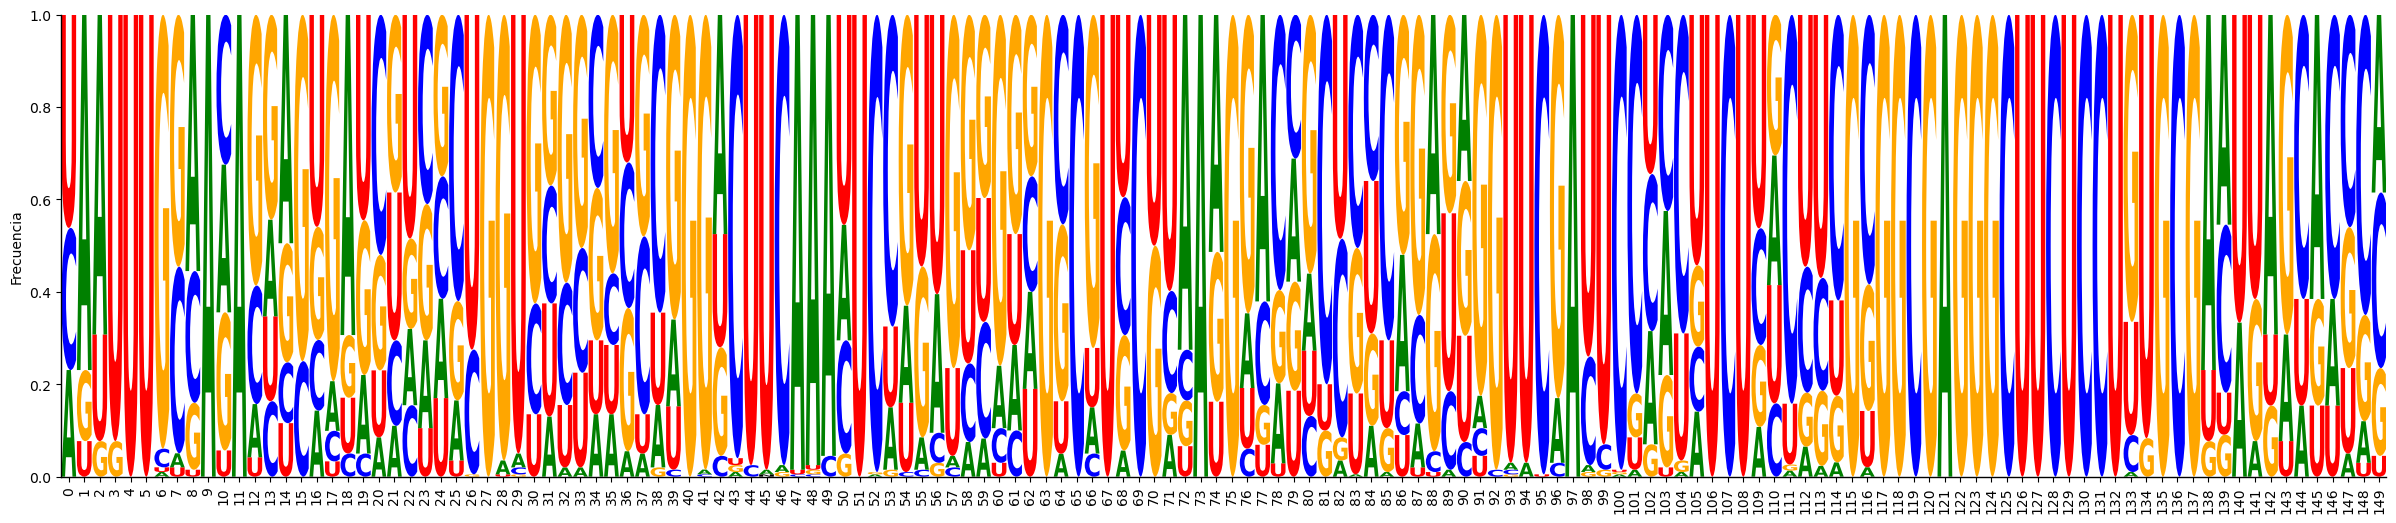

In [36]:
!pip install logomaker
import logomaker

c:\Users\ro-ma\anaconda3\Lib\site-packages\logomaker\src\error_handling.py:58: UserWarning:  Warning: Character 'N' is not in color_dict. Using black.
  warnings.warn(str(Error))


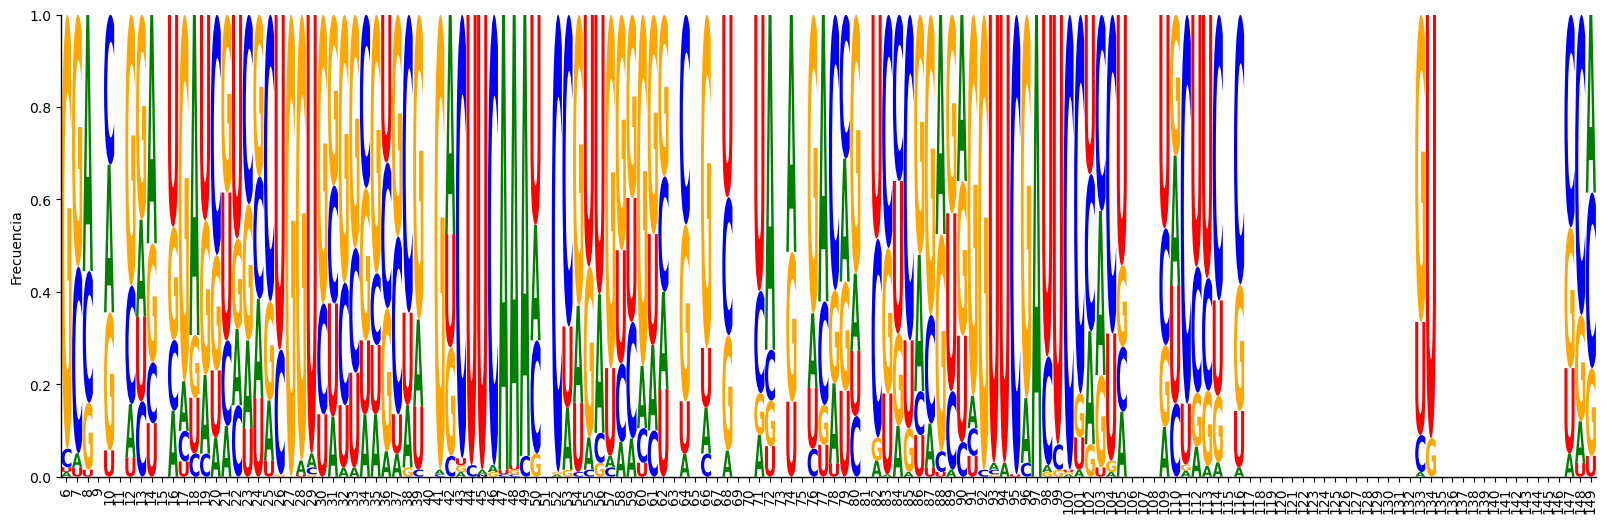

In [51]:
from Bio import SeqIO
import pandas as pd
import logomaker
import matplotlib.pyplot as plt

# =====================================================
# 1. Corregir alineamiento: rellenar gaps para igualar longitudes
# =====================================================
sequences = list(SeqIO.parse("tRNA_alignment.fasta", "fasta"))
max_length = max(len(seq.seq) for seq in sequences)

for seq in sequences:
    seq_length = len(seq.seq)
    if seq_length < max_length:
        seq.seq = seq.seq + "-" * (max_length - seq_length)  # rellenar con guiones

SeqIO.write(sequences, "alignment_corrected.fasta", "fasta")

# =====================================================
# 2. Función: convertir FASTA en matriz de frecuencias
# =====================================================
def fasta_to_matrix(fasta_file, gap_threshold=0.9):
    seqs = [str(record.seq) for record in SeqIO.parse(fasta_file, "fasta")]
    df = pd.DataFrame([list(seq) for seq in seqs])

    # Calcular proporción de gaps en cada columna
    gap_fraction = (df == "-").sum() / len(df)

    # Filtrar columnas con menos del 90% gaps
    df = df.loc[:, gap_fraction < gap_threshold]

    # Reemplazar gaps por NA antes de contar
    df.replace("-", pd.NA, inplace=True)

    # Calcular frecuencias normalizadas
    freq_matrix = pd.DataFrame(
        {i: df[i].value_counts(normalize=True) for i in df.columns}
    ).fillna(0)

    return freq_matrix

# =====================================================
# 3. Generar matriz de frecuencias filtrada
# =====================================================
frequency_matrix = fasta_to_matrix("alignment_corrected.fasta", gap_threshold=0.9)
df = frequency_matrix.T  # posiciones = filas

# =====================================================
# 4. Crear el sequence logo
# =====================================================
num_positions = df.shape[0]
width = max(10, num_positions * 0.2)
height = 6

fig, ax = plt.subplots(figsize=(width, height))

logo = logomaker.Logo(
    df,
    ax=ax,
    shade_below=.5,
    fade_below=.5,
    color_scheme="classic"
)

logo.style_spines(visible=False)
logo.style_spines(spines=['left', 'bottom'], visible=True)
logo.style_xticks(rotation=90)
logo.ax.set_ylabel('Frecuencia')

plt.savefig("tRNA_logo_filtered.png", dpi=300, bbox_inches='tight')
plt.show()


In [2]:
from Bio import AlignIO
import pandas as pd

# =====================================================
# 1. Cargar el alineamiento múltiple
# =====================================================
alignment = AlignIO.read("tRNA_alignment.fasta", "fasta")

# =====================================================
# 2. Definir una función para mapear posiciones Sprinzl a columnas
# =====================================================
def map_sprinzl_to_alignment(ref_seq, aligned_seq, positions):
    mapping = {}
    sprinzl_index = 1
    for col_idx, base in enumerate(aligned_seq):
        if base != "-":
            if sprinzl_index in positions:
                mapping[sprinzl_index] = col_idx
            sprinzl_index += 1
    return mapping

# =====================================================
# 3. Elegir secuencia de referencia (ej: Homo sapiens)
# =====================================================
ref_record = None
for rec in alignment:
    if "Homo_sapiens" in rec.id or "Homo_sapiens" in rec.description:
        ref_record = rec
        break

if ref_record is None:
    raise ValueError("❌ No se encontró Homo sapiens en el MSA como referencia")

# Definimos las posiciones clave en Sprinzl
positions_sprinzl = {
    "anticodon_34": 34,
    "anticodon_35": 35,
    "anticodon_36": 36,
    "discriminator_73": 73
}

mapping = map_sprinzl_to_alignment(
    str(ref_record.seq).replace("-", ""),
    ref_record.seq,
    positions_sprinzl.values()
)
print("📍 Mapping Sprinzl → MSA:", mapping)

# =====================================================
# 4. Recorrer todas las secuencias y extraer motivos
# =====================================================
results = []
for rec in alignment:
    seq = rec.seq
    motifs = {}
    motifs["ID"] = rec.id

    # Anticodón (34–36)
    anticodon = "".join(seq[mapping[pos]] if mapping[pos] < len(seq) else "?" 
                        for pos in [34, 35, 36])
    motifs["Anticodon"] = anticodon

    # Base discriminadora (73)
    discr = seq[mapping[73]] if mapping[73] < len(seq) else "?"
    motifs["Discriminator"] = discr

    # Estimar brazos (muy simplificado, usando posiciones Sprinzl aproximadas)
    motifs["Acceptor_stem_len"] = 9  # en Sec suele ser 8–9, fijo por convención
    motifs["D_stem_len"] = 6  # valor canónico; se puede mejorar con predicción estructural
    motifs["T_stem_len"] = 4  # valor esperado en Sec
    motifs["D_loop_len"] = 4
    motifs["Variable_arm"] = "long"  # característico de tRNASec

    results.append(motifs)

df = pd.DataFrame(results)

# =====================================================
# 5. Guardar resultados
# =====================================================
df.to_csv("tRNA_structural_motifs.csv", index=False)

# Mostrar conteos resumen
print("\n=== Resumen Anticodón ===")
print(df["Anticodon"].value_counts())

print("\n=== Resumen Base Discriminadora (73) ===")
print(df["Discriminator"].value_counts())

print("\n✅ Resultados guardados en tRNA_structural_motifs.csv")


📍 Mapping Sprinzl → MSA: {34: 43, 35: 44, 36: 45, 73: 99}

=== Resumen Anticodón ===
Anticodon
CUU    189
UUU      3
AUU      2
GCA      2
CCU      2
GCU      1
CUN      1
Name: count, dtype: int64

=== Resumen Base Discriminadora (73) ===
Discriminator
U    186
C     11
G      3
Name: count, dtype: int64

✅ Resultados guardados en tRNA_structural_motifs.csv


In [1]:
import os
import subprocess
import platform

def run_infernal_alignment(input_fasta, output_alignment, cm_model="/home/ro-ma/infernal_models/infernal/RF01852.cm"):
    """
    Alinea las secuencias de tRNASec usando Infernal (cmalign) con el modelo RF01852.
    Si se ejecuta en Windows, redirige el comando a WSL automáticamente.
    """
    if not os.path.exists(input_fasta):
        print(f"❌ Error: El archivo de entrada FASTA '{input_fasta}' no existe (en Windows).")
        return

    # Detectar sistema operativo
    is_windows = platform.system().lower().startswith("win")

    print("⏳ Ejecutando Infernal (cmalign) para el alineamiento estructural...")

    try:
        stockholm_file = output_alignment.replace(".fasta", ".sto")

        # Construir comando base
        base_cmd = ["cmalign", cm_model, input_fasta]

        if is_windows:
            # Si estás en Windows, ejecuta en WSL
            base_cmd = ["wsl"] + base_cmd
            cm_model = cm_model  # ya debe estar en /home/... dentro de WSL
            print("💡 Ejecutando cmalign a través de WSL...")

        # Guardar salida intermedia en formato Stockholm
        with open(stockholm_file, "w") as sto_out:
            subprocess.run(base_cmd, stdout=sto_out, check=True)

        # Convertir a FASTA (esl-reformat)
        base_cmd_reformat = ["esl-reformat", "afa", stockholm_file]
        if is_windows:
            base_cmd_reformat = ["wsl"] + base_cmd_reformat
            print("💡 Ejecutando esl-reformat a través de WSL...")

        with open(output_alignment, "w") as fasta_out:
            subprocess.run(base_cmd_reformat, stdout=fasta_out, check=True)

        if os.path.exists(output_alignment) and os.path.getsize(output_alignment) > 0:
            print(f"✅ Alineamiento Infernal guardado en: {output_alignment}")
        else:
            print("❌ Error: cmalign no generó salida.")

    except subprocess.CalledProcessError as e:
        print(f"❌ Error ejecutando cmalign: {e}")
    except FileNotFoundError:
        print("❌ No se encontró cmalign o esl-reformat en tu PATH. Asegúrate de tener Infernal instalado en WSL.")


In [2]:
input_fasta = "../data/processed/tRNA_sequences.fasta"
alignment_file = "tRNA_alignment.fasta"
cm_model = "/home/ro-ma/infernal_models/infernal/RF01852.cm"

In [6]:
import os
import pandas as pd
import subprocess
import platform
from Bio import Phylo
import matplotlib.pyplot as plt
from collections import Counter
from ete3 import Tree, TreeStyle
from IPython.display import Image, display
import re

# =====================================================
# 🔧 Configuración de rutas
# =====================================================

# Archivos de entrada/salida
input_file = "../data/raw/200_trna_sec.csv"
output_fasta = "../data/processed/tRNA_sequences.fasta"
alignment_file = "tRNA_alignment.fasta"
tree_file = "tRNA_phylogenetic_tree.nhx"

# Ejecutables externos
fasttree_exe = r"C:\Program Files\FastTree\FastTree.exe"  # para Windows
cm_model = "/home/ro-ma/infernal_models/infernal/RF01852.cm"  # ruta Linux (WSL)

# =====================================================
# 1. Convertir CSV a FASTA
# =====================================================
def convert_csv_to_fasta(csv_path, fasta_path):
    """Convierte CSV a FASTA, priorizando nombre científico."""
    try:
        df = pd.read_csv(csv_path)
        with open(fasta_path, "w") as fasta_file:
            for _, row in df.iterrows():
                species_name = row['species']
                description = row['description']
                
                # Patrón 1: binomial clásico
                match_two_words = re.search(r'([A-Z][a-z]+ [a-z]+)', description)
                if match_two_words:
                    species_name = match_two_words.group(1)
                else:
                    # Patrón 2: una sola palabra
                    match_one_word = re.search(r'([A-Z][a-z]+)', description)
                    if match_one_word:
                        species_name = match_one_word.group(1)
                
                if species_name and species_name.islower():
                    species_name = description
                
                header = f">{row['URS_ID']}|{species_name}|{description}"
                sequence = row['Sequence']
                fasta_file.write(f"{header}\n{sequence}\n")
        print(f"✅ Archivo FASTA creado en: {fasta_path}")
    except FileNotFoundError:
        print(f"❌ Error: El archivo {csv_path} no fue encontrado.")
    except Exception as e:
        print(f"❌ Error al convertir a FASTA: {e}")

# =====================================================
# 2. Alineamiento con Infernal (cmalign + RF01852)
# =====================================================
def run_infernal_alignment(input_fasta, output_alignment, cm_model=cm_model):
    """Alinea secuencias con Infernal. Usa WSL si estás en Windows."""
    if not os.path.exists(input_fasta):
        print(f"❌ Error: no existe FASTA '{input_fasta}'.")
        return

    is_windows = platform.system().lower().startswith("win")
    stockholm_file = output_alignment.replace(".fasta", ".sto")

    try:
        # --- cmalign ---
        cmd_cmalign = ["cmalign", cm_model, input_fasta]
        if is_windows:
            cmd_cmalign = ["wsl"] + cmd_cmalign
            print("💡 Ejecutando cmalign a través de WSL...")

        with open(stockholm_file, "w") as sto_out:
            subprocess.run(cmd_cmalign, stdout=sto_out, check=True)

        # --- esl-reformat ---
        cmd_reformat = ["esl-reformat", "afa", stockholm_file]
        if is_windows:
            cmd_reformat = ["wsl"] + cmd_reformat
            print("💡 Ejecutando esl-reformat a través de WSL...")

        with open(output_alignment, "w") as fasta_out:
            subprocess.run(cmd_reformat, stdout=fasta_out, check=True)

        if os.path.exists(output_alignment) and os.path.getsize(output_alignment) > 0:
            print(f"✅ Alineamiento Infernal guardado en: {output_alignment}")
        else:
            print("❌ Error: cmalign no generó salida.")

    except subprocess.CalledProcessError as e:
        print(f"❌ Error ejecutando Infernal: {e}")

# =====================================================
# 3. Construcción del Árbol con FastTree
# =====================================================
def build_phylogenetic_tree(input_alignment, output_tree):
    """Construye árbol filogenético con FastTree."""
    if not os.path.exists(input_alignment):
        print(f"❌ Error: no existe alineamiento '{input_alignment}'.")
        return

    print("⏳ Construyendo árbol filogenético con FastTree...")
    try:
        with open(output_tree, "w") as out_tree:
            subprocess.run(
                [fasttree_exe, "-nt", input_alignment],
                stdout=out_tree,
                check=True
            )
        print(f"✅ Árbol guardado en: {output_tree}")
    except subprocess.CalledProcessError as e:
        print(f"❌ Error ejecutando FastTree: {e}")

# =====================================================
# 4. Visualización radial única
# =====================================================
def visualize_tree_radial(tree_file, out_image="tree_radial.png"):
    """Visualiza el árbol en formato radial con ete3."""
    if not os.path.exists(tree_file):
        print(f"❌ Error: no existe árbol '{tree_file}'.")
        return

    print("📊 Visualizando árbol filogenético en formato radial...")
    t = Tree(tree_file)

    ts = TreeStyle()
    ts.mode = "c"       # circular
    ts.show_leaf_name = True
    ts.show_branch_support = True
    ts.scale = 50

    t.render(out_image, tree_style=ts, w=2000, units="px")
    print(f"✅ Imagen radial del árbol guardada en: {out_image}")
    display(Image(filename=out_image))

# =====================================================
# 5. Interpretación automática del Árbol
# =====================================================
def interpret_tree_markdown(tree_file, report_file="tree_report.md"):
    """Interpreta el árbol y genera informe Markdown básico."""
    if not os.path.exists(tree_file):
        print(f"❌ Error: no existe {tree_file}")
        return
    
    tree = Phylo.read(tree_file, "newick")
    leaves = tree.get_terminals()
    n_total = len(leaves)

    report = []
    report.append("# 📖 Interpretación automática del árbol filogenético\n")
    report.append(f"- Número total de secuencias: **{n_total}**\n")

    species = [str(leaf).split("|")[1].strip() for leaf in leaves if "|" in str(leaf)]
    sp_counts = Counter(species)
    report.append("## 🧾 Especies más frecuentes\n")
    for sp, c in sp_counts.most_common(10):
        report.append(f"- {sp}: {c} secuencias")

    with open(report_file, "w", encoding="utf-8") as f:
        f.write("\n".join(report))

    print(f"✅ Informe generado en: {report_file}")

# =====================================================
# 🚀 Flujo principal
# =====================================================
if __name__ == "__main__":
    # 1. Convertir CSV a FASTA
    convert_csv_to_fasta(input_file, output_fasta)

    # 2. Alineamiento Infernal
    if os.path.exists(output_fasta):
        run_infernal_alignment(output_fasta, alignment_file, cm_model=cm_model)

    # 3. Construcción del árbol
    if os.path.exists(alignment_file):
        build_phylogenetic_tree(alignment_file, tree_file)

    # 4. Visualización radial
    if os.path.exists(tree_file):
        visualize_tree_radial(tree_file, out_image="tRNA_tree_radial.png")

    # 5. Interpretación automática
    if os.path.exists(tree_file):
        interpret_tree_markdown(tree_file)


✅ Archivo FASTA creado en: ../data/processed/tRNA_sequences.fasta
💡 Ejecutando cmalign a través de WSL...
💡 Ejecutando esl-reformat a través de WSL...
❌ Error ejecutando Infernal: Command '['wsl', 'esl-reformat', 'afa', 'tRNA_alignment.sto']' returned non-zero exit status 127.
⏳ Construyendo árbol filogenético con FastTree...
❌ Error ejecutando FastTree: Command '['C:\\Program Files\\FastTree\\FastTree.exe', '-nt', 'tRNA_alignment.fasta']' returned non-zero exit status 1.
📊 Visualizando árbol filogenético en formato radial...


c:\Users\ro-ma\anaconda3\Lib\site-packages\ete3\coretype\tree.py:365: SyntaxWarning: invalid escape sequence '\-'
  """
c:\Users\ro-ma\anaconda3\Lib\site-packages\ete3\coretype\tree.py:436: SyntaxWarning: invalid escape sequence '\-'
  """Prunes the topology of a node to conserve only the selected list of leaf
c:\Users\ro-ma\anaconda3\Lib\site-packages\ete3\coretype\tree.py:1508: SyntaxWarning: invalid escape sequence '\-'
  """
c:\Users\ro-ma\anaconda3\Lib\site-packages\ete3\parser\newick.py:51: SyntaxWarning: invalid escape sequence '\['
  _ILEGAL_NEWICK_CHARS = ":;(),\[\]\t\n\r="
c:\Users\ro-ma\anaconda3\Lib\site-packages\ete3\parser\newick.py:54: SyntaxWarning: invalid escape sequence '\['
  _NHX_RE = "\[&&NHX:[^\]]*\]"
c:\Users\ro-ma\anaconda3\Lib\site-packages\ete3\parser\newick.py:55: SyntaxWarning: invalid escape sequence '\s'
  _FLOAT_RE = "\s*[+-]?\d+\.?\d*(?:[eE][-+]?\d+)?\s*"
c:\Users\ro-ma\anaconda3\Lib\site-packages\ete3\parser\newick.py:402: SyntaxWarning: invalid escape

NewickError: Unexisting tree file or Malformed newick tree structure.
You may want to check other newick loading flags like 'format' or 'quoted_node_names'.